In [1664]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import json
import numpy as np

In [1665]:
# Import stock prices of global (non-US) involved companies
global_stock_prices_df = pd.read_csv('/Users/connor.stevens/Documents/global_stock_data.csv')
print(global_stock_prices_df.head())

   gvkey  iid    datadate                    conm            cshoc   
0   9818  01W  2015-10-01  SONY GROUP CORPORATION 1262162260.00000  \
1   9818  01W  2015-10-02  SONY GROUP CORPORATION 1262162260.00000   
2   9818  01W  2015-10-05  SONY GROUP CORPORATION 1262162260.00000   
3   9818  01W  2015-10-06  SONY GROUP CORPORATION 1262162260.00000   
4   9818  01W  2015-10-07  SONY GROUP CORPORATION 1262162260.00000   

          cshtrd      prccd    trfd          isin  
0 12208200.00000 2996.00000 1.27335  JP3435000009  
1  9628600.00000 3094.00000 1.27335  JP3435000009  
2  8807600.00000 3142.00000 1.27335  JP3435000009  
3  6426700.00000 3156.00000 1.27335  JP3435000009  
4  6163800.00000 3205.00000 1.27335  JP3435000009  


In [1666]:
global_stock_prices_df.shape

(89532, 9)

In [1667]:
# Drop total return factor trfd.
global_stock_prices_df = global_stock_prices_df.drop('trfd', axis = 1)

In [1668]:
# For some reason there are currencies of other prices in here. They can be dropped safely.
global_stock_prices_df[(global_stock_prices_df['conm'] == 'SONY GROUP CORPORATION') & (global_stock_prices_df['isin'] != global_stock_prices_df['isin'])]

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,isin
1977,9818,02W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,715.00000,21.68500,NaN
1978,9818,02W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,1669.00000,22.77500,NaN
1979,9818,02W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,7900.00000,23.53500,NaN
1980,9818,02W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,3440.00000,23.54000,NaN
1981,9818,02W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,8060.00000,23.60000,NaN
...,...,...,...,...,...,...,...,...
4066,9818,05W,2023-04-24,SONY GROUP CORPORATION,1261081781.00000,NaN,83.45000,NaN
4067,9818,05W,2023-04-25,SONY GROUP CORPORATION,1261081781.00000,NaN,83.45000,NaN
4068,9818,05W,2023-04-26,SONY GROUP CORPORATION,1261081781.00000,NaN,83.45000,NaN
4069,9818,05W,2023-04-27,SONY GROUP CORPORATION,1261081781.00000,NaN,83.45000,NaN


In [1669]:
# Get all companies data.
with open('companies.json') as json_file:
  companies_list = json.load(json_file)

isin_list = []
us_company_names =[
  'ELECTRONIC ARTS INC',
  'TAKE-TWO INTERACTIVE SFTWR',
  'ACTIVISION BLIZZARD INC',
  'MICROSOFT CORP'
]
# Create a list of acceptable isin codes.
for company in companies_list:
  
  # Check if company name is in us_company_names.
  if company['company_name'] not in us_company_names:
    isin_list.append(company['stock_id'])

print(isin_list)
print(len(isin_list))


['JP3164630000', 'JP3218900003', 'FR0000054470', 'JP3435000009', 'NO0010887029', 'JP3756600007', 'JP3419050004', 'JP3300200007', 'JP3778630008', 'FI4000251897', 'JP3283460008', 'FR0012419307', 'USU0858L1036', 'JP3214350005', 'PLOPTTC00011', 'FR0013482791', 'SE0008294953', 'GB00BYVX2X20', 'PLPLAYW00015', 'PL11BTS00015', 'IT0001469995', 'JP3860230006', 'GB00BBT32N39', 'JP3826770004', 'PLCTINT00018', 'PLBLOBR00014', 'FR0013331212', 'SE0015195888', 'JP3944350002', 'SE0005992831', 'JP3748520008', 'SE0011725506', 'PLA340200023', 'JP3687000004', 'PLARTFX00011', 'PLFRENT00014', 'PLSNTFG00017', 'PLGMSOP00019']
38


In [1670]:
# Function for flagging rows to drop.
def flag_to_drop(isin_string):
    # If ISIN not in isin_list then True for dropping.
    if isin_string not in isin_list:
        return True
    else:
        return False

In [1671]:
global_stock_prices_df['drop_flag'] = global_stock_prices_df['isin'].map(flag_to_drop)
global_stock_prices_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,isin,drop_flag
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,12208200.00000,2996.00000,JP3435000009,False
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,9628600.00000,3094.00000,JP3435000009,False
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,8807600.00000,3142.00000,JP3435000009,False
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,6426700.00000,3156.00000,JP3435000009,False
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,6163800.00000,3205.00000,JP3435000009,False


In [1672]:
global_stock_prices_df[global_stock_prices_df['drop_flag'] == True].head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,isin,drop_flag
1977,9818,02W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,715.00000,21.68500,NaN,True
1978,9818,02W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,1669.00000,22.77500,NaN,True
1979,9818,02W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,7900.00000,23.53500,NaN,True
1980,9818,02W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,3440.00000,23.54000,NaN,True
1981,9818,02W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,8060.00000,23.60000,NaN,True


In [1673]:
global_stock_prices_df.shape

(89532, 9)

In [1674]:
global_stock_prices_df = global_stock_prices_df.drop(global_stock_prices_df[global_stock_prices_df['drop_flag'] == True].index)

In [1675]:
global_stock_prices_df.shape

(62506, 9)

In [1676]:
# Can now drop the drop_flag column.
global_stock_prices_df = global_stock_prices_df.drop('drop_flag', axis=1)

In [1677]:
global_stock_prices_df.shape

(62506, 8)

<Axes: >

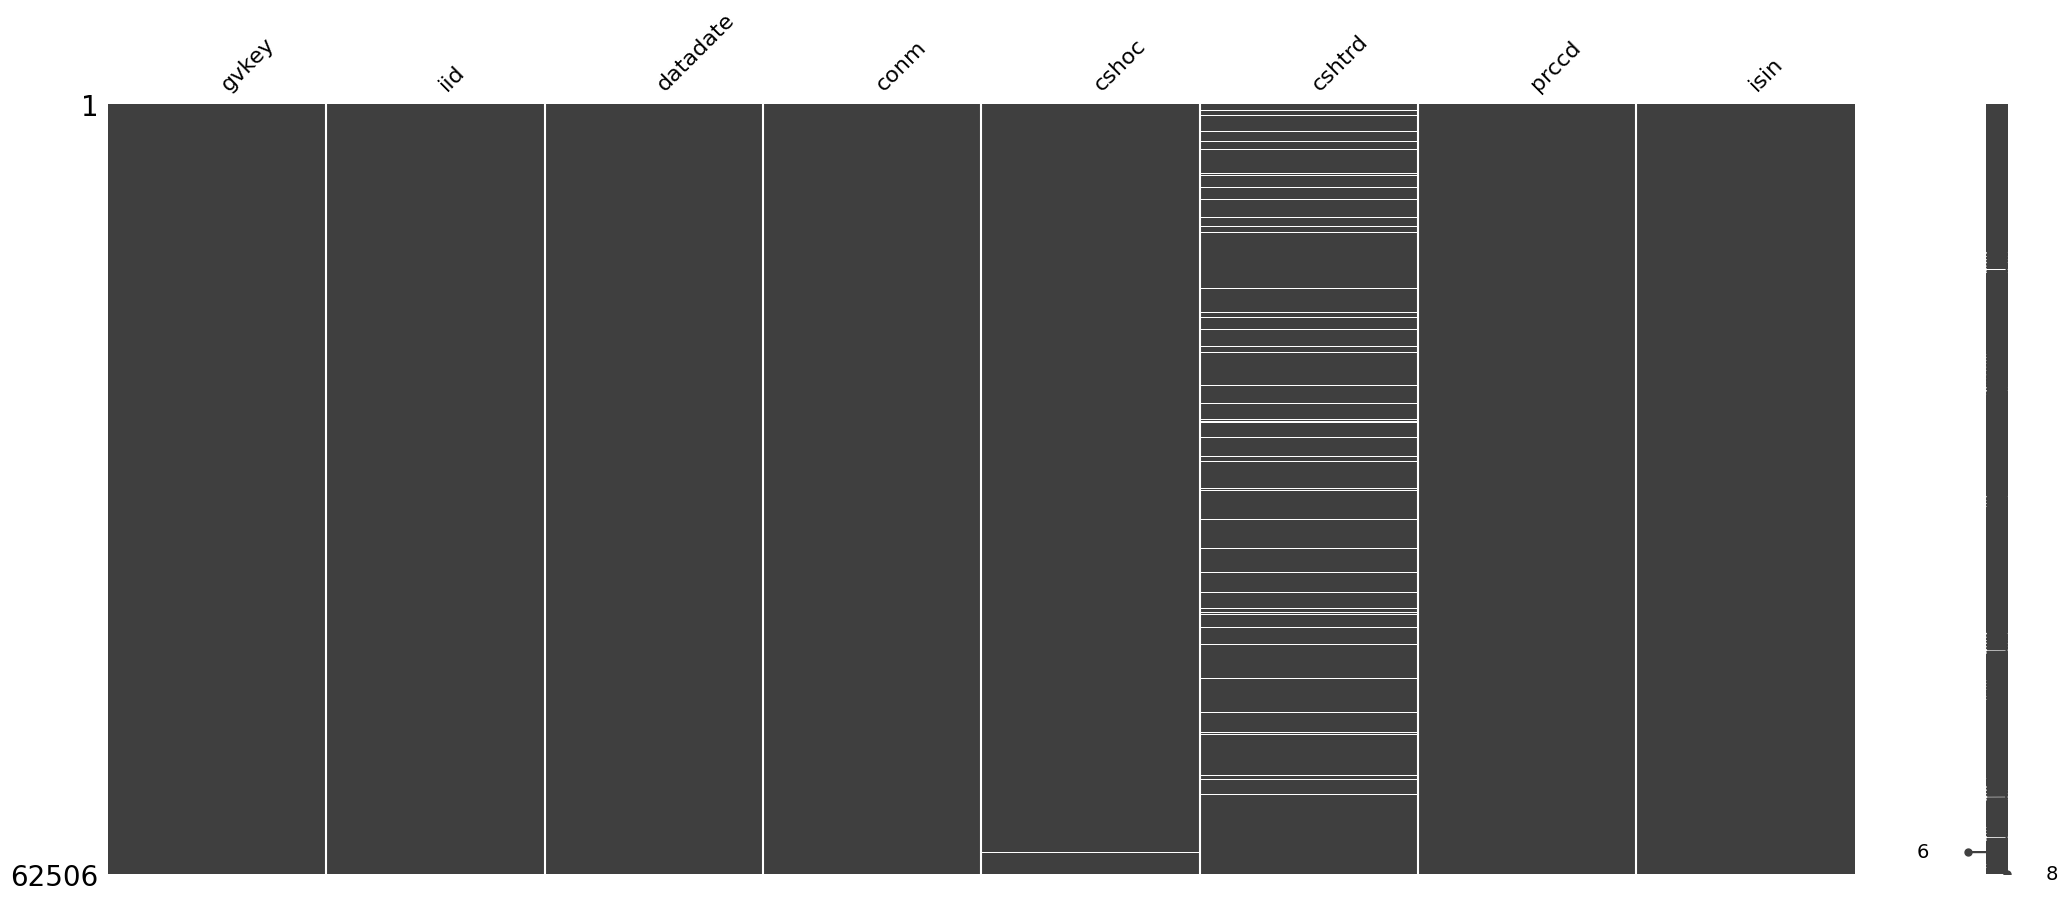

In [1678]:
%matplotlib inline

msno.matrix(global_stock_prices_df)

In [1679]:
global_stock_prices_df = global_stock_prices_df.drop_duplicates(subset=['datadate', 'isin'])

In [1680]:
# Filter the DataFrame to only include rows where the conm is 'SONY GROUP CORPORATION'
sony_df = global_stock_prices_df[global_stock_prices_df['conm'] == 'SONY GROUP CORPORATION']

# Select the unique values of the stock_id column
sony_stock_ids = sony_df['isin'].unique()

# Display the resulting stock IDs
print(sony_stock_ids)

print(sony_df['datadate'].duplicated().value_counts())

# sony_df.loc[index].head()


['JP3435000009']
datadate
False    1977
Name: count, dtype: int64


<Axes: >

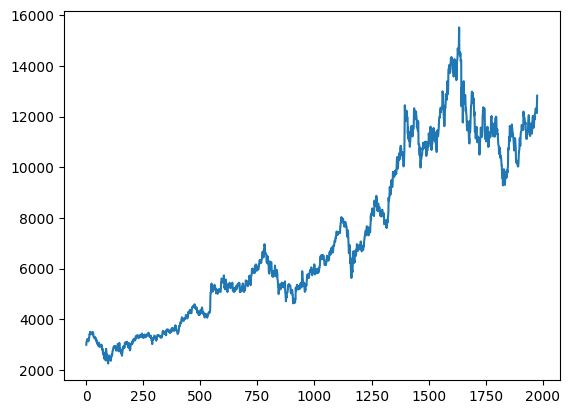

In [1681]:
sony_df['prccd'].plot()

In [1682]:
sony_df.describe()

,gvkey,cshoc,cshtrd,prccd
count,1977.00000,1977.00000,1850.00000,1977.00000
mean,9818.00000,1264350707.64846,6218386.64865,7186.15706
std,0.00000,4005863.76223,3608279.10792,3368.21668
min,9818.00000,1261000278.00000,1009800.00000,2257.00000
25%,9818.00000,1261081781.00000,3865125.00000,4279.00000
50%,9818.00000,1262517360.00000,5291850.00000,6170.00000
75%,9818.00000,1266552149.00000,7344100.00000,10775.00000
max,9818.00000,1273737678.00000,40679500.00000,15520.00000


<Axes: >

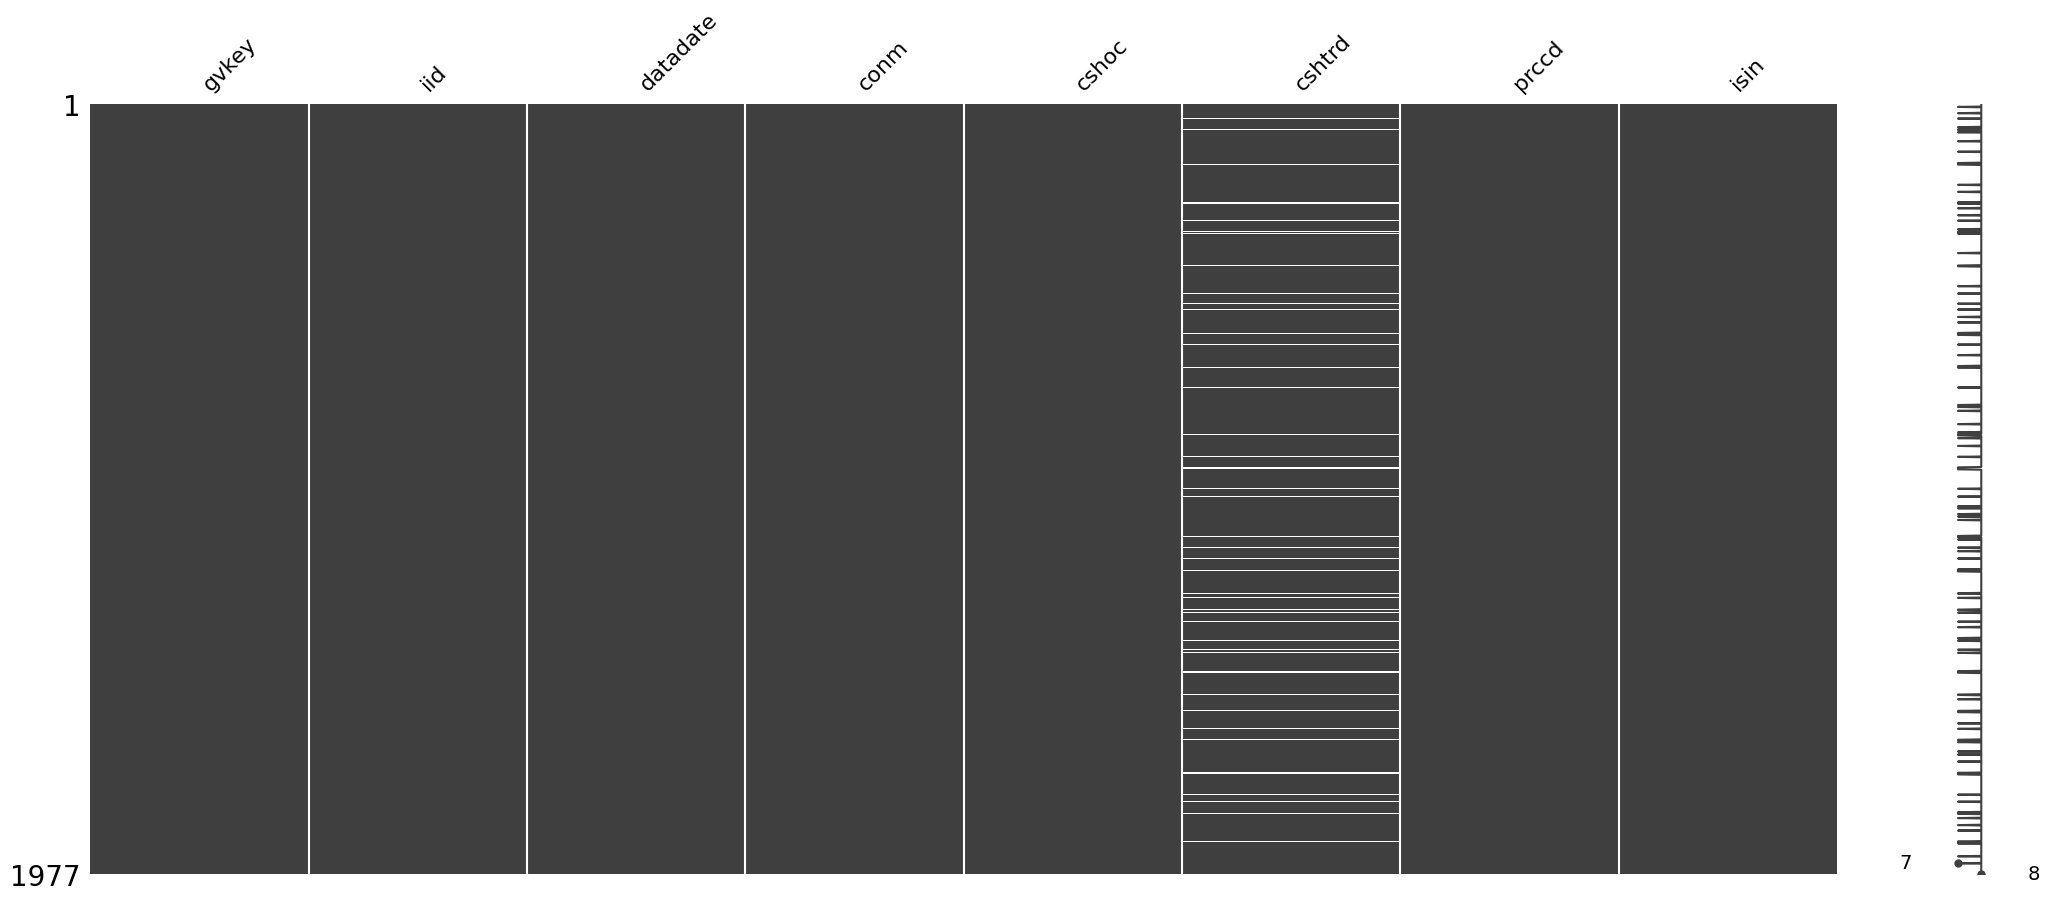

In [1683]:
# Check missing data for us stock prices.
%matplotlib inline

msno.matrix(sony_df)

In [1684]:
us_stock_prices_df = pd.read_csv('/Users/connor.stevens/Documents/us_stock_data.csv')
us_stock_prices_df.head()

,gvkey,iid,datadate,tic,conm,cshoc,cshtrd,prccd,trfd
0,12141,1,2015-10-01,MSFT,MICROSOFT CORP,7997981000.00000,28564790.00000,44.61000,1.42077
1,12141,1,2015-10-02,MSFT,MICROSOFT CORP,7997981000.00000,41789610.00000,45.57000,1.42077
2,12141,1,2015-10-05,MSFT,MICROSOFT CORP,7997981000.00000,33546080.00000,46.63000,1.42077
3,12141,1,2015-10-06,MSFT,MICROSOFT CORP,7997981000.00000,27504360.00000,46.75000,1.42077
4,12141,1,2015-10-07,MSFT,MICROSOFT CORP,7997981000.00000,27695610.00000,46.80000,1.42077


In [1685]:
# Get names of US invovled companies.
us_stock_prices_df['conm'].unique()

array(['MICROSOFT CORP', 'ELECTRONIC ARTS INC',
       'TAKE-TWO INTERACTIVE SFTWR', 'ACTIVISION BLIZZARD INC'],
      dtype=object)

<Axes: >

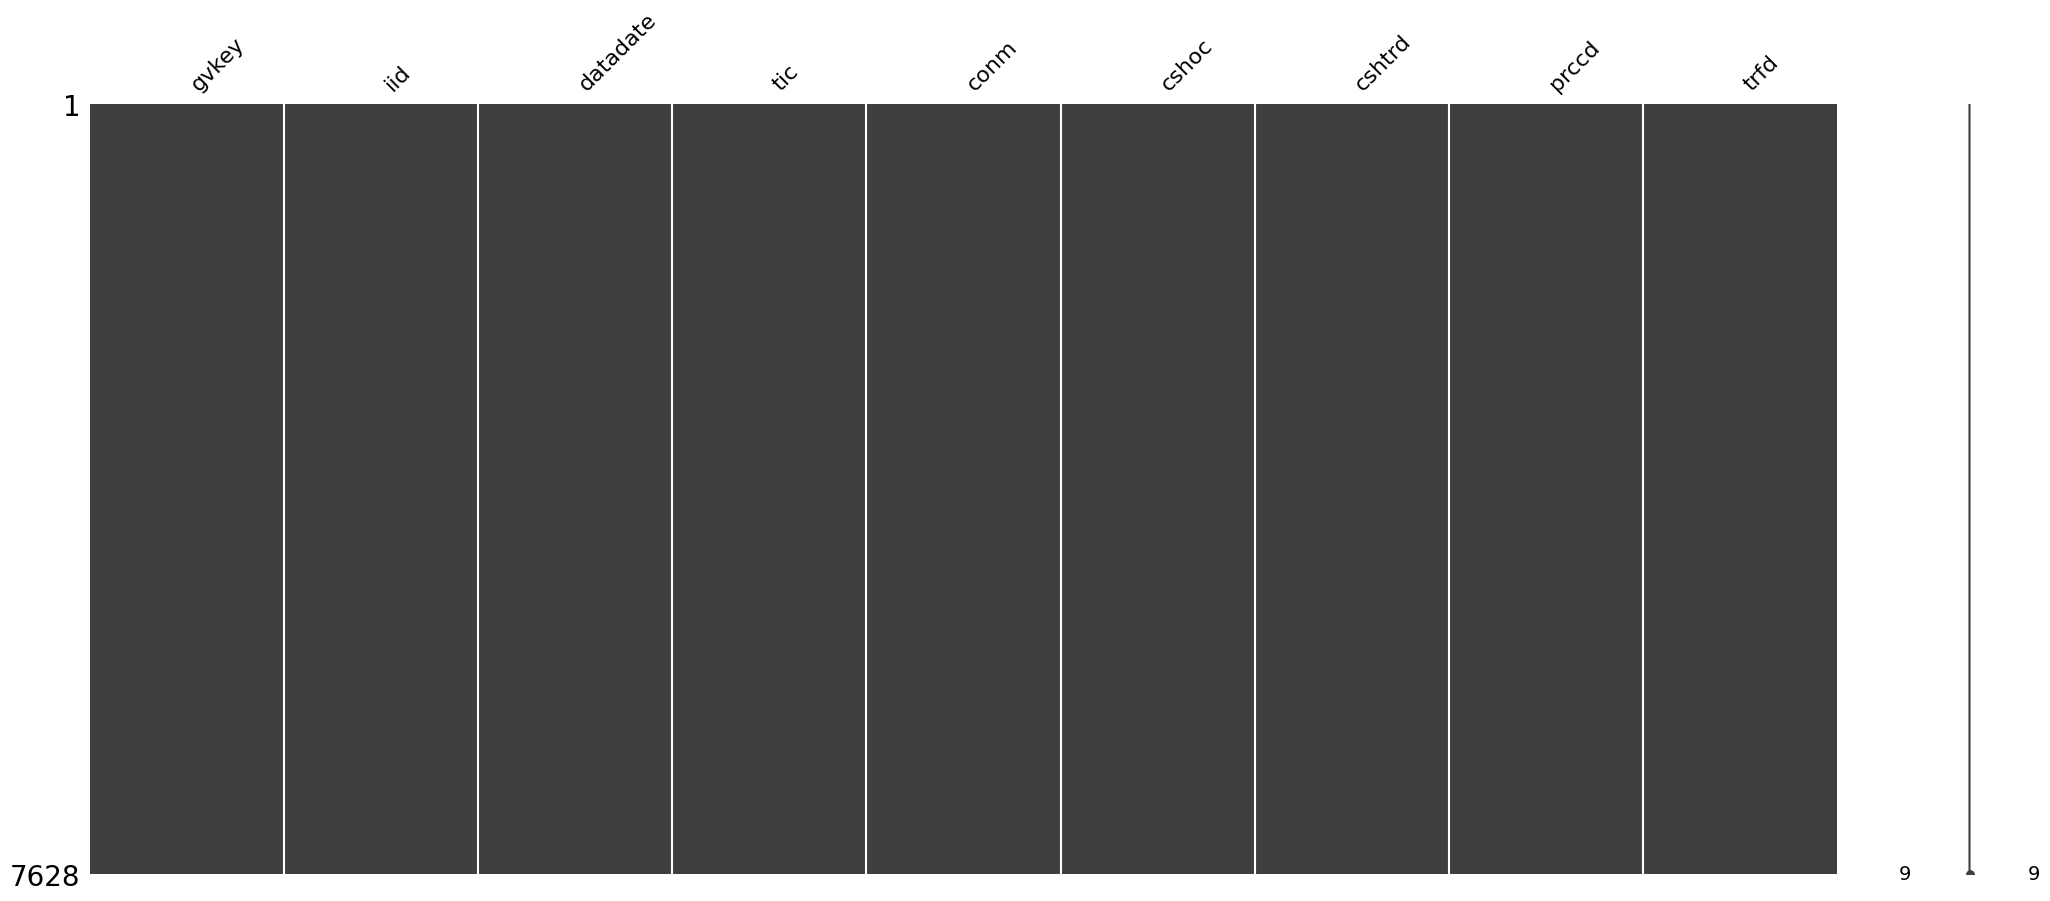

In [1686]:
# Check missing data for us stock prices.
%matplotlib inline

msno.matrix(us_stock_prices_df)

In [1687]:
# Get names of involved companies.
global_stock_prices_df['conm'].unique()

array(['SONY GROUP CORPORATION', 'NINTENDO CO LTD',
       'KONAMI GROUP CORPORATION', 'CAPCOM CO LTD',
       'BANDAI NAMCO HOLDINGS INC', 'KOEI TECMO HOLDINGS CO LTD',
       'UBI SOFT ENTERTAINMENT SA', 'SQUARE ENIX HLDGS CO LTD',
       'KADOKAWA CORPORATION', 'SEGA SAMMY HLDGS INC', 'STARBREEZE AB',
       'DIGITAL BROS SPA', 'CD PROJEKT SA', "YUKE'S CO LTD",
       'MARVELOUS INC', 'NIHON FALCOM CORP', 'FUNCOM SE',
       'NIPPON ICHI SOFTWARE INC', 'CI GAMES SE', '11 BIT STUDIOS SA',
       'BLOOBER TEAM SA', 'FRONTIER DEVELOPMENTS PLC',
       'FOCUS ENTERTAINMENT SOCIETE', 'FURYU CORP',
       'PARADOX INTERACTIVE AB', 'FOREVER ENTERTAINMENT SA', 'PLAYWAY SA',
       'ARTIFEX MUNDI SA', 'REMEDY', "DON'T NOD ENTR SA",
       'TEAM17 GROUP PLC', 'ZORDIX AB', 'NACON SA', 'GAMES OPERATORS SA',
       'ALL IN GAMES SA', 'THUNDERFUL GROUP AB', 'DEVOLVER DIGITAL INC',
       'BIG CHEESE STUDIO SPOLKA'], dtype=object)

<Axes: >

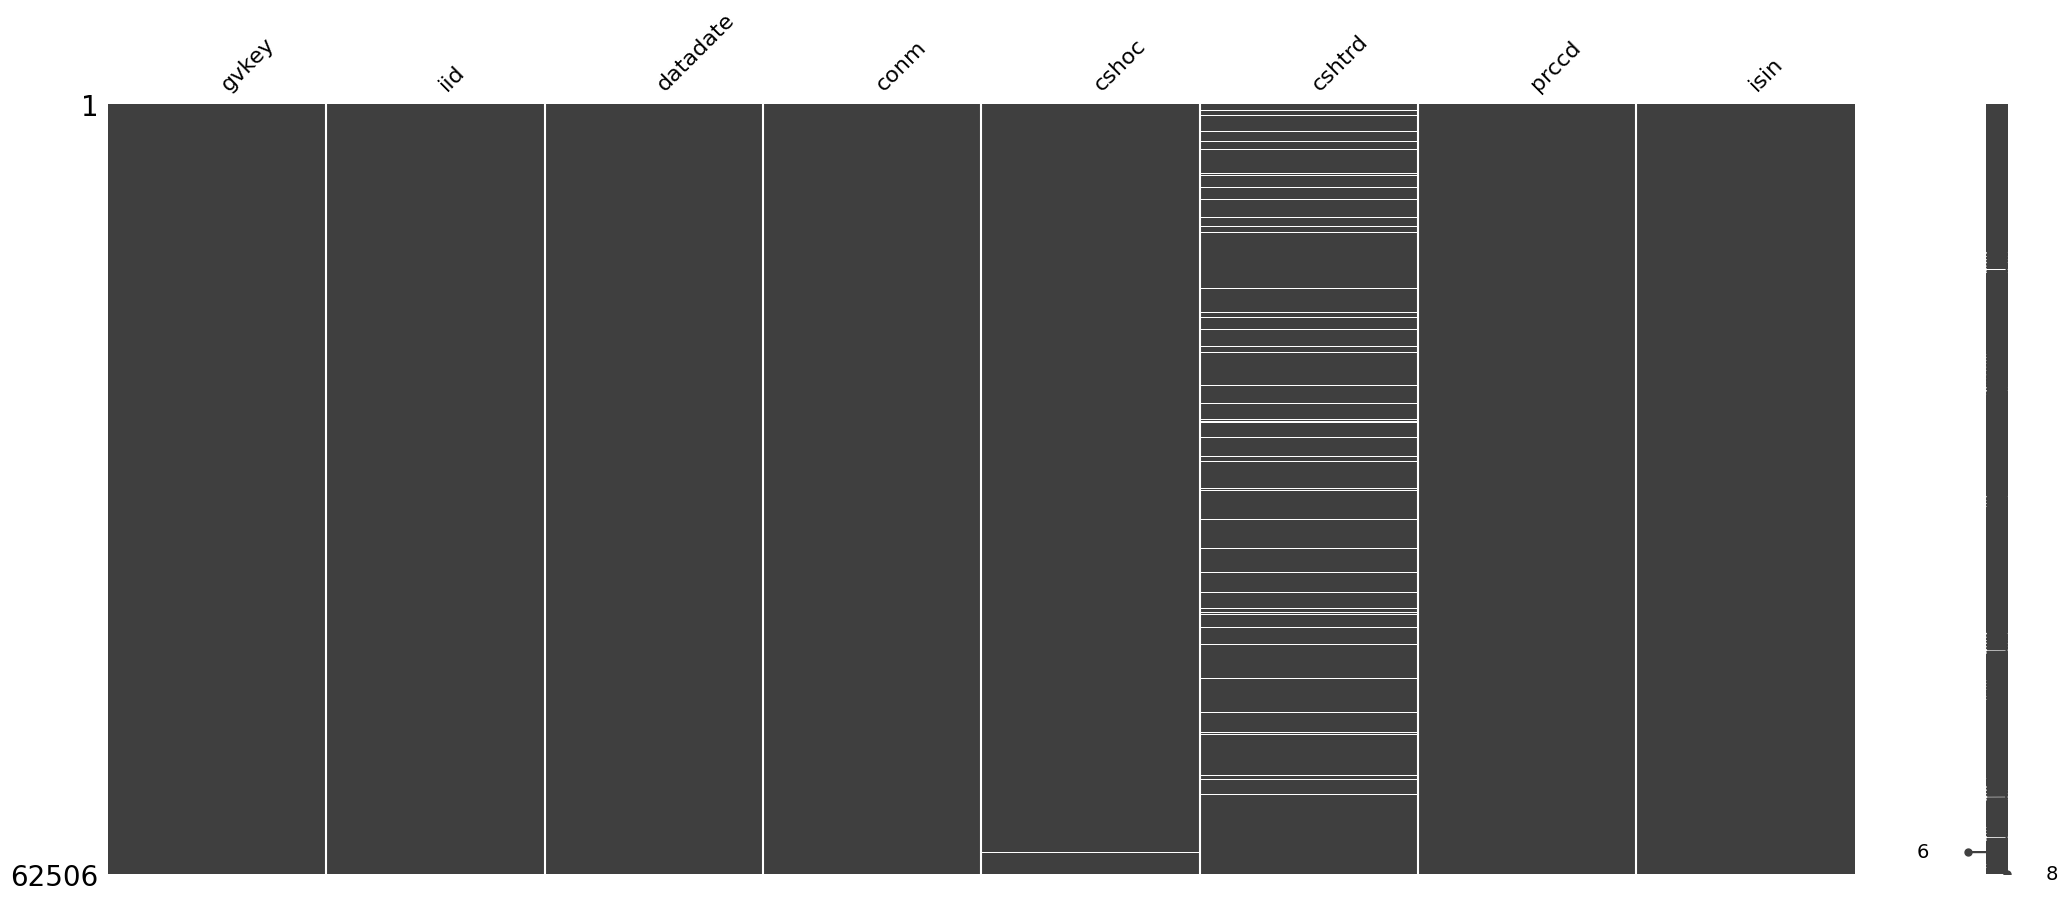

In [1688]:
# Check missing data for global stock prices.
%matplotlib inline

msno.matrix(global_stock_prices_df)

The global stock data has many missing values for isin, but these are known and stored in companies.json. Use this to fill out the isin values.

In [1689]:
# Create function for filling in missing isin values.
def fill_missing_isin(company_name_input):
    
    for company in companies_list:
        if company['company_name'] == company_name_input:
            return company['stock_id']
        
        else:
            continue

In [1690]:
# Fill in missing isin values in global_stock_prices_df
global_stock_prices_df['isin'] = global_stock_prices_df['conm'].map(fill_missing_isin)
global_stock_prices_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,isin
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,12208200.00000,2996.00000,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,9628600.00000,3094.00000,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,8807600.00000,3142.00000,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,6426700.00000,3156.00000,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,6163800.00000,3205.00000,JP3435000009


<Axes: >

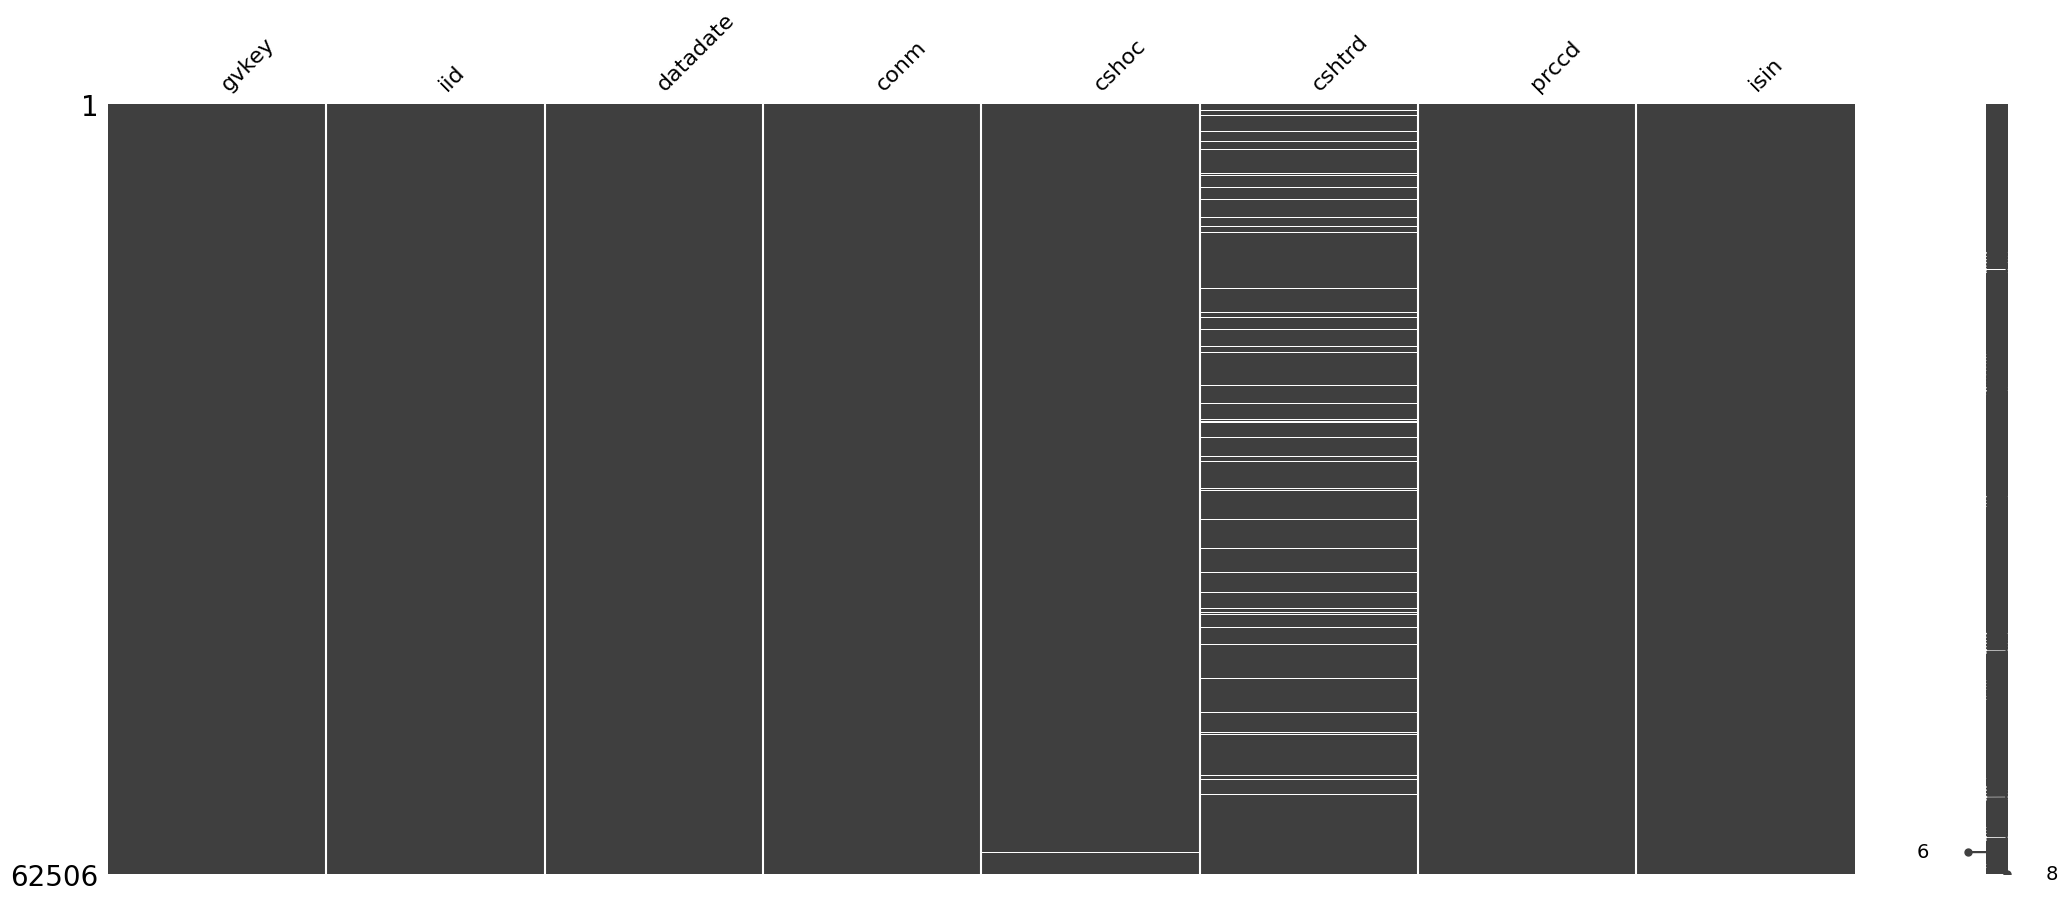

In [1691]:
# Check missing data for global stock prices after filling in missing values
%matplotlib inline

msno.matrix(global_stock_prices_df)

Need to join the US and Global datasets together before continuing. Begin by changing the name of `isin` column in global and `tic` in us to `stock_id`.

In [1692]:
# Make a column called stock_id in us dataset and copy gvkey into it.
us_stock_prices_df['stock_id'] = us_stock_prices_df['gvkey']
us_stock_prices_df.head()

,gvkey,iid,datadate,tic,conm,cshoc,cshtrd,prccd,trfd,stock_id
0,12141,1,2015-10-01,MSFT,MICROSOFT CORP,7997981000.00000,28564790.00000,44.61000,1.42077,12141
1,12141,1,2015-10-02,MSFT,MICROSOFT CORP,7997981000.00000,41789610.00000,45.57000,1.42077,12141
2,12141,1,2015-10-05,MSFT,MICROSOFT CORP,7997981000.00000,33546080.00000,46.63000,1.42077,12141
3,12141,1,2015-10-06,MSFT,MICROSOFT CORP,7997981000.00000,27504360.00000,46.75000,1.42077,12141
4,12141,1,2015-10-07,MSFT,MICROSOFT CORP,7997981000.00000,27695610.00000,46.80000,1.42077,12141


In [1693]:
us_stock_prices_df = us_stock_prices_df.drop('trfd', axis=1)

In [1694]:
# Rename isin and tic to stock_id.
global_stock_prices_df = global_stock_prices_df.rename(columns={'isin': 'stock_id'})
global_stock_prices_df.head()


,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,stock_id
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,12208200.00000,2996.00000,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,9628600.00000,3094.00000,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,8807600.00000,3142.00000,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,6426700.00000,3156.00000,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,6163800.00000,3205.00000,JP3435000009


In [1695]:
# Drop tic column as it does not exist in the global dataset. Removing in necessary before joining the datasets.
us_stock_prices_df = us_stock_prices_df.drop('tic', axis=1)
us_stock_prices_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,stock_id
0,12141,1,2015-10-01,MICROSOFT CORP,7997981000.00000,28564790.00000,44.61000,12141
1,12141,1,2015-10-02,MICROSOFT CORP,7997981000.00000,41789610.00000,45.57000,12141
2,12141,1,2015-10-05,MICROSOFT CORP,7997981000.00000,33546080.00000,46.63000,12141
3,12141,1,2015-10-06,MICROSOFT CORP,7997981000.00000,27504360.00000,46.75000,12141
4,12141,1,2015-10-07,MICROSOFT CORP,7997981000.00000,27695610.00000,46.80000,12141


Next, concatenate the two datasets into a single dataset now that they both have the same column names.

In [1696]:
# List of dataframes to concatenate.
dataframes = [global_stock_prices_df, us_stock_prices_df]
stock_data_df = pd.concat(dataframes)
stock_data_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,stock_id
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,12208200.00000,2996.00000,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,9628600.00000,3094.00000,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,8807600.00000,3142.00000,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,6426700.00000,3156.00000,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,6163800.00000,3205.00000,JP3435000009


In [1697]:
# Check the number of unique company names to make sure they are all there now.
print(len(stock_data_df['conm'].unique()))
print(stock_data_df['conm'].unique())

42
['SONY GROUP CORPORATION' 'NINTENDO CO LTD' 'KONAMI GROUP CORPORATION'
 'CAPCOM CO LTD' 'BANDAI NAMCO HOLDINGS INC' 'KOEI TECMO HOLDINGS CO LTD'
 'UBI SOFT ENTERTAINMENT SA' 'SQUARE ENIX HLDGS CO LTD'
 'KADOKAWA CORPORATION' 'SEGA SAMMY HLDGS INC' 'STARBREEZE AB'
 'DIGITAL BROS SPA' 'CD PROJEKT SA' "YUKE'S CO LTD" 'MARVELOUS INC'
 'NIHON FALCOM CORP' 'FUNCOM SE' 'NIPPON ICHI SOFTWARE INC' 'CI GAMES SE'
 '11 BIT STUDIOS SA' 'BLOOBER TEAM SA' 'FRONTIER DEVELOPMENTS PLC'
 'FOCUS ENTERTAINMENT SOCIETE' 'FURYU CORP' 'PARADOX INTERACTIVE AB'
 'FOREVER ENTERTAINMENT SA' 'PLAYWAY SA' 'ARTIFEX MUNDI SA' 'REMEDY'
 "DON'T NOD ENTR SA" 'TEAM17 GROUP PLC' 'ZORDIX AB' 'NACON SA'
 'GAMES OPERATORS SA' 'ALL IN GAMES SA' 'THUNDERFUL GROUP AB'
 'DEVOLVER DIGITAL INC' 'BIG CHEESE STUDIO SPOLKA' 'MICROSOFT CORP'
 'ELECTRONIC ARTS INC' 'TAKE-TWO INTERACTIVE SFTWR'
 'ACTIVISION BLIZZARD INC']


In [1698]:
# Rename single dataframe columns to be more self-explanatory.
stock_data_df = stock_data_df.rename(columns={
    'datadate': 'date',
    'conm': 'company_name',
    'cshoc': 'shares_outstanding',
    'cshtrd': 'trading_volume',
    'prccd': 'closing_price',
    'trfd': 'total_return_factor'
    })

In [1699]:
# Convert stock_data_df date column to datetime.
stock_data_df['date'] = pd.to_datetime(stock_data_df['date'])
stock_data_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,12208200.00000,2996.00000,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,9628600.00000,3094.00000,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,8807600.00000,3142.00000,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,6426700.00000,3156.00000,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,6163800.00000,3205.00000,JP3435000009


<Axes: >

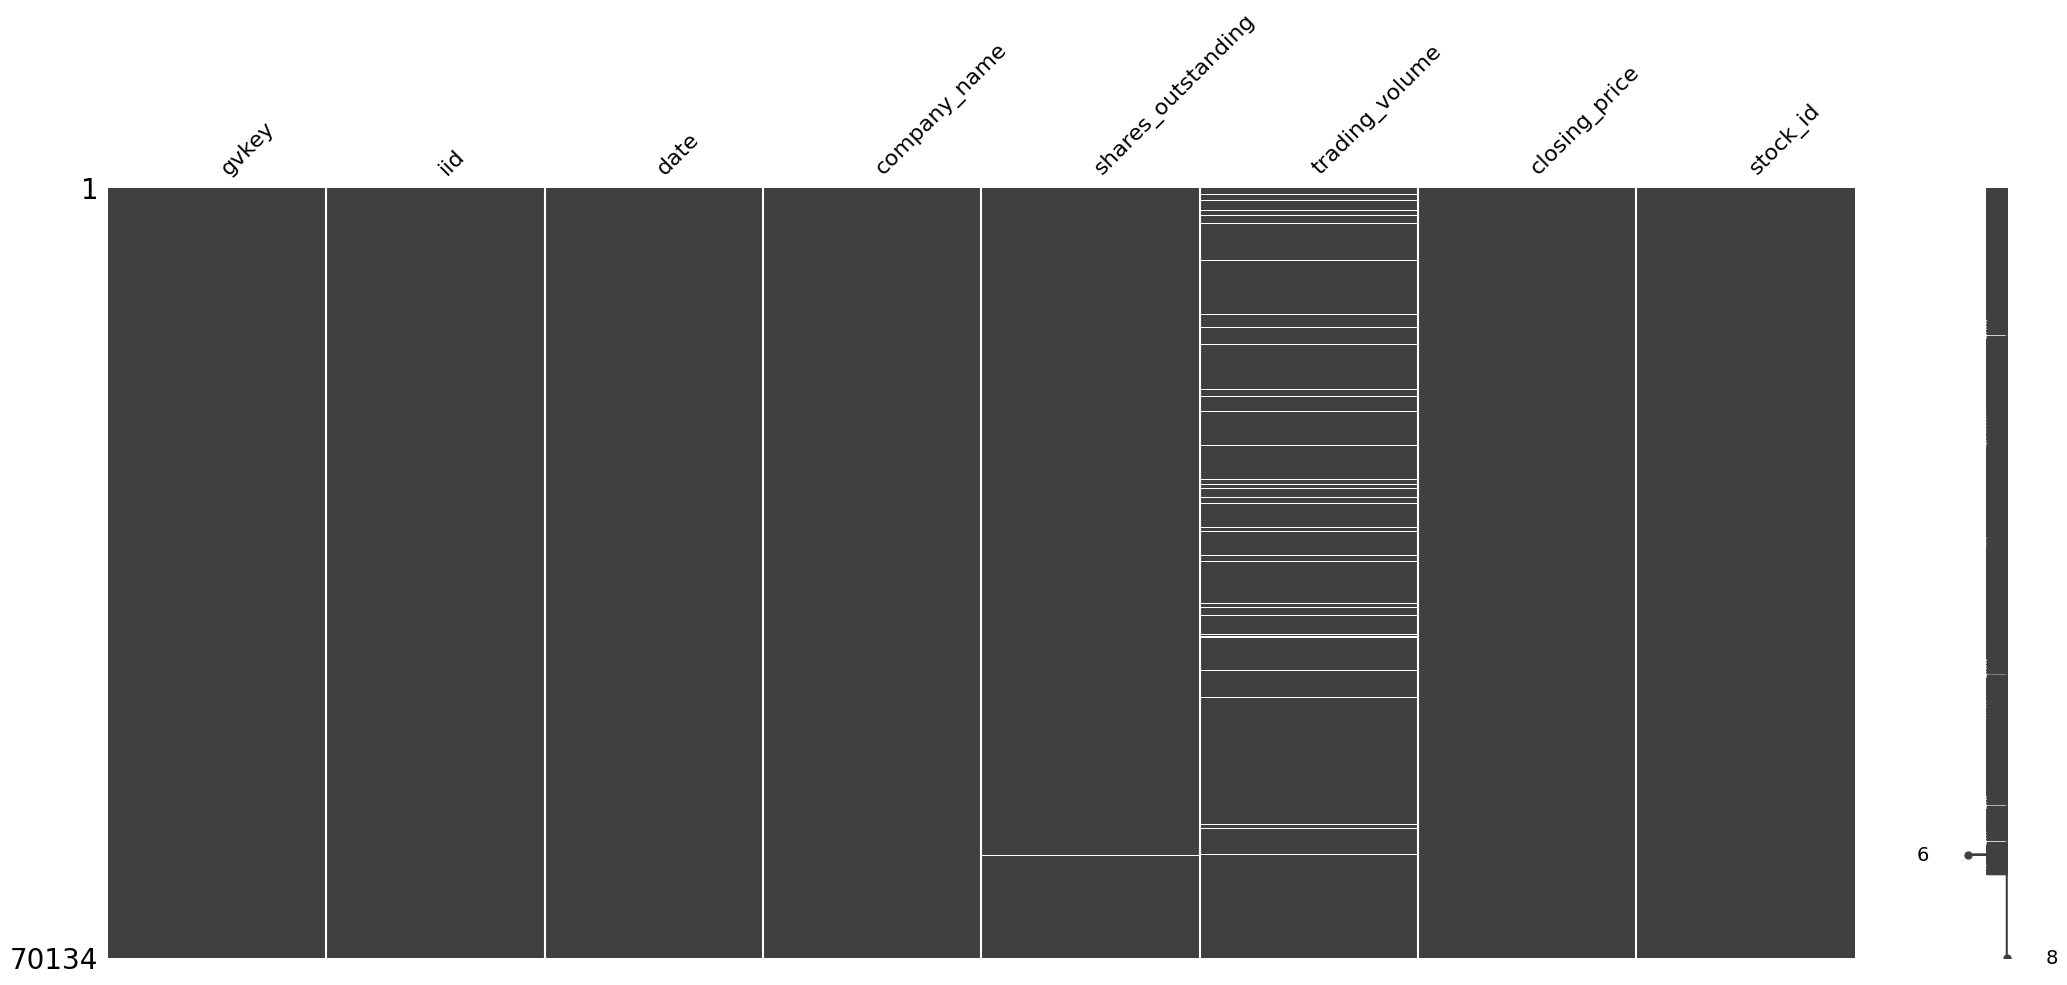

In [1700]:
# Check how much missing data is present in the combined dataset.
# Plot missing data.
%matplotlib inline

msno.matrix(stock_data_df)

There is data missing for shares outstanding, trading volume and stock_id, this needs to be investigated further.

In [1701]:
stock_data_df[stock_data_df['shares_outstanding'].isna()]

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id
86934,343796,01W,2020-06-08,ALL IN GAMES SA,NaN,153766.00000,19.50000,PLSNTFG00017
86935,343796,01W,2020-06-09,ALL IN GAMES SA,NaN,196033.00000,18.00000,PLSNTFG00017
86936,343796,01W,2020-06-10,ALL IN GAMES SA,NaN,135502.00000,17.60000,PLSNTFG00017
86937,343796,01W,2020-06-11,ALL IN GAMES SA,NaN,NaN,17.60000,PLSNTFG00017
86938,343796,01W,2020-06-12,ALL IN GAMES SA,NaN,45500.00000,17.00000,PLSNTFG00017
...,...,...,...,...,...,...,...,...
87019,343796,01W,2020-10-05,ALL IN GAMES SA,NaN,12409.00000,22.90000,PLSNTFG00017
87020,343796,01W,2020-10-06,ALL IN GAMES SA,NaN,12584.00000,23.00000,PLSNTFG00017
87021,343796,01W,2020-10-07,ALL IN GAMES SA,NaN,6582.00000,22.80000,PLSNTFG00017
87022,343796,01W,2020-10-08,ALL IN GAMES SA,NaN,23621.00000,22.70000,PLSNTFG00017


In [1702]:
stock_data_df[stock_data_df['trading_volume'].isna()]

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id
7,9818,01W,2015-10-12,SONY GROUP CORPORATION,1262208560.00000,NaN,3211.00000,JP3435000009
23,9818,01W,2015-11-03,SONY GROUP CORPORATION,1262215860.00000,NaN,3433.00000,JP3435000009
37,9818,01W,2015-11-23,SONY GROUP CORPORATION,1262221560.00000,NaN,3285.00000,JP3435000009
59,9818,01W,2015-12-23,SONY GROUP CORPORATION,1262300660.00000,NaN,2913.00000,JP3435000009
65,9818,01W,2015-12-31,SONY GROUP CORPORATION,1262300660.00000,NaN,3002.00000,JP3435000009
...,...,...,...,...,...,...,...,...
89161,351615,01W,2021-12-22,BIG CHEESE STUDIO SPOLKA,135000.00000,NaN,33.60000,PLA340200023
89162,351615,01W,2021-12-23,BIG CHEESE STUDIO SPOLKA,135000.00000,NaN,33.60000,PLA340200023
89163,351615,01W,2021-12-24,BIG CHEESE STUDIO SPOLKA,135000.00000,NaN,33.60000,PLA340200023
89165,351615,01W,2021-12-28,BIG CHEESE STUDIO SPOLKA,135000.00000,NaN,33.70000,PLA340200023


In [1703]:
stock_data_df[stock_data_df['stock_id'].isna()]

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id


Next, join the Fama-French five factors to this dataset.

In [1704]:
europe_ff_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/Europe_5_Factors_Daily.csv', skiprows=6)
europe_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19900702,0.99000,0.00000,-0.56000,0.43000,-0.25000,0.03000
1,19900703,0.33000,-0.09000,0.00000,0.02000,0.28000,0.03000
2,19900704,0.24000,0.03000,-0.19000,-0.09000,0.23000,0.03000
3,19900705,-0.64000,0.22000,0.08000,-0.36000,0.07000,0.03000
4,19900706,0.07000,-0.24000,0.13000,0.02000,0.11000,0.03000


In [1705]:
japan_ff_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/Japan_5_Factors_Daily.csv', skiprows=6)
japan_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19900702,0.85000,0.31000,-0.05000,-0.07000,0.18000,0.03000
1,19900703,0.07000,0.65000,0.27000,-0.28000,0.27000,0.03000
2,19900704,1.45000,0.50000,0.25000,-0.06000,-0.10000,0.03000
3,19900705,-0.64000,0.53000,0.37000,0.39000,0.13000,0.03000
4,19900706,-0.02000,0.52000,0.22000,0.21000,-0.07000,0.03000


In [1706]:
us_ff_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/North_America_5_Factors_Daily.csv', skiprows=6)
us_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19900702,0.30000,-0.36000,-0.11000,0.30000,-0.02000,0.03000
1,19900703,0.13000,-0.08000,-0.41000,0.41000,-0.20000,0.03000
2,19900704,-0.02000,-0.02000,0.02000,-0.01000,0.00000,0.03000
3,19900705,-0.99000,0.45000,0.10000,-0.09000,-0.01000,0.03000
4,19900706,0.56000,-0.52000,-0.36000,0.38000,-0.02000,0.03000


`date` column in currently an integer, this needs to be parsed to be datetime.

In [1707]:
# Write function for parsing the date
def parse_date_column_ymd(date_int):

    # Convert integer to string.
    date_string = str(date_int)
    
    return datetime.datetime.strptime(date_string, '%Y%m%d')

In [1708]:
# Parse dates on all dfs.
# NOT IDEMPOTENT, only run once.
europe_ff_df['date'] = europe_ff_df['date'].map(parse_date_column_ymd)
japan_ff_df['date'] = japan_ff_df['date'].map(parse_date_column_ymd)
us_ff_df['date'] = us_ff_df['date'].map(parse_date_column_ymd)

europe_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1990-07-02,0.99000,0.00000,-0.56000,0.43000,-0.25000,0.03000
1,1990-07-03,0.33000,-0.09000,0.00000,0.02000,0.28000,0.03000
2,1990-07-04,0.24000,0.03000,-0.19000,-0.09000,0.23000,0.03000
3,1990-07-05,-0.64000,0.22000,0.08000,-0.36000,0.07000,0.03000
4,1990-07-06,0.07000,-0.24000,0.13000,0.02000,0.11000,0.03000


In [1709]:
# Rename all FF factor columns to be lower case for consistent naming.
europe_ff_df = europe_ff_df.rename(columns={"Mkt-RF": "mkt-rf", "SMB": "smb", "HML": "hml", "RMW": "rmw", "CMA": "cma", "RF": "rf"})
japan_ff_df = japan_ff_df.rename(columns={"Mkt-RF": "mkt-rf", "SMB": "smb", "HML": "hml", "RMW": "rmw", "CMA": "cma", "RF": "rf"})
us_ff_df = us_ff_df.rename(columns={"Mkt-RF": "mkt-rf", "SMB": "smb", "HML": "hml", "RMW": "rmw", "CMA": "cma", "RF": "rf"})

us_ff_df.head()

,date,mkt-rf,smb,hml,rmw,cma,rf
0,1990-07-02,0.30000,-0.36000,-0.11000,0.30000,-0.02000,0.03000
1,1990-07-03,0.13000,-0.08000,-0.41000,0.41000,-0.20000,0.03000
2,1990-07-04,-0.02000,-0.02000,0.02000,-0.01000,0.00000,0.03000
3,1990-07-05,-0.99000,0.45000,0.10000,-0.09000,-0.01000,0.03000
4,1990-07-06,0.56000,-0.52000,-0.36000,0.38000,-0.02000,0.03000


In order to join the returns and FF factors, a region flag is needed in stock_data_df.

In [1710]:
# Create a list of region stock_ids using companies_list from earlier.
eu_ids = []
jp_ids = []
us_ids = []
for company in companies_list:
    if company['region'] == 'eu':
        eu_ids.append(company['stock_id'])

    if company['region'] == 'jp':
        jp_ids.append(company['stock_id'])

    if company['region'] == 'us':
        us_ids.append(company['stock_id'])

print(us_ids)

['16721', '64630', '18040', '12141']


In [1711]:
# Make all stock_id values strings.
stock_data_df['stock_id'] = stock_data_df['stock_id'].astype('string')

In [1712]:
# Function for creating region booleans.
def is_jp_region(stock_id):
    if stock_id in jp_ids:
        return True
    else:
        return False

def is_eu_region(stock_id):
    if stock_id in eu_ids:
        return True
    else:
        return False
    
def is_us_region(stock_id):
    if stock_id in us_ids:
        return True
    else:
        return False

In [1713]:
stock_data_df['company_name'] = stock_data_df['company_name'].astype(str)

In [1714]:
stock_data_df.dtypes

gvkey                          int64
iid                           object
date                  datetime64[ns]
company_name                  object
shares_outstanding           float64
trading_volume               float64
closing_price                float64
stock_id              string[python]
dtype: object

In [1715]:
stock_data_df['stock_id'].values.unique()

<StringArray>
['JP3435000009', 'JP3756600007', 'JP3300200007', 'JP3218900003',
 'JP3778630008', 'JP3283460008', 'FR0000054470', 'JP3164630000',
 'JP3214350005', 'JP3419050004', 'SE0005992831', 'IT0001469995',
 'PLOPTTC00011', 'JP3944350002', 'JP3860230006', 'JP3748520008',
 'NO0010887029', 'JP3687000004', 'PLCTINT00018', 'PL11BTS00015',
 'PLBLOBR00014', 'GB00BBT32N39', 'FR0012419307', 'JP3826770004',
 'SE0008294953', 'PLFRENT00014', 'PLPLAYW00015', 'PLARTFX00011',
 'FI4000251897', 'FR0013331212', 'GB00BYVX2X20', 'SE0011725506',
 'FR0013482791', 'PLGMSOP00019', 'PLSNTFG00017', 'SE0015195888',
 'USU0858L1036', 'PLA340200023',        '12141',        '16721',
        '64630',       '180405']
Length: 42, dtype: string

Need to fill in missing `stock_id` before creating region bools.

In [1716]:
# Use companies_list from earlier in the notebook.
# Function to fill in missing stock_id.
def stock_id_from_name(name_string, stock_id_string):
    # If stock_id is nan.
    if pd.isna(stock_id_string):
        # Loop through companies.
        for company in companies_list:
            # If name of company with missing stock_id is the same as the company name
            # from companies_list
            if company['company_name'] == name_string:
                # Return associated stock_id.
                return company['stock_id']
            
            else:
                continue
    else:
        return stock_id_string

In [1717]:
# Fill in missing stock_id.
stock_data_df['stock_id'] = stock_data_df.apply(lambda x: stock_id_from_name(name_string=x['company_name'], stock_id_string=x['stock_id']), axis=1)
stock_data_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,12208200.00000,2996.00000,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,9628600.00000,3094.00000,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,8807600.00000,3142.00000,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,6426700.00000,3156.00000,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,6163800.00000,3205.00000,JP3435000009


In [1718]:
# Create region bool columns.
stock_data_df['eu'] = stock_data_df['stock_id'].map(is_eu_region)
stock_data_df['jp'] = stock_data_df['stock_id'].map(is_jp_region)
stock_data_df['us'] = stock_data_df['stock_id'].map(is_us_region)
# stock_data_df[stock_data_df['us'] == True].head()

With the region flags, create regional subset datasets to be joined with the regional FF factors. Later they will be joined with their respective regional indices which will be used for caluculating abnormal return.

In [1719]:
# Get subset of stock_data_df based on each region.
stock_data_eu_df = stock_data_df[stock_data_df['eu']]
stock_data_jp_df = stock_data_df[stock_data_df['jp']]
stock_data_us_df= stock_data_df[stock_data_df['us']]

stock_data_us_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,us
0,12141,1,2015-10-01,MICROSOFT CORP,7997981000.00000,28564790.00000,44.61000,12141,False,False,True
1,12141,1,2015-10-02,MICROSOFT CORP,7997981000.00000,41789610.00000,45.57000,12141,False,False,True
2,12141,1,2015-10-05,MICROSOFT CORP,7997981000.00000,33546080.00000,46.63000,12141,False,False,True
3,12141,1,2015-10-06,MICROSOFT CORP,7997981000.00000,27504360.00000,46.75000,12141,False,False,True
4,12141,1,2015-10-07,MICROSOFT CORP,7997981000.00000,27695610.00000,46.80000,12141,False,False,True


In [1720]:
# Join eu subset with europe fama french data.
stock_data_ff_eu_df = pd.merge(stock_data_eu_df, europe_ff_df, how='left', on='date')
stock_data_ff_jp_df = pd.merge(stock_data_jp_df, japan_ff_df, how='left', on='date')
stock_data_ff_us_df = pd.merge(stock_data_us_df, us_ff_df, how='left', on='date')

stock_data_us_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,us
0,12141,1,2015-10-01,MICROSOFT CORP,7997981000.00000,28564790.00000,44.61000,12141,False,False,True
1,12141,1,2015-10-02,MICROSOFT CORP,7997981000.00000,41789610.00000,45.57000,12141,False,False,True
2,12141,1,2015-10-05,MICROSOFT CORP,7997981000.00000,33546080.00000,46.63000,12141,False,False,True
3,12141,1,2015-10-06,MICROSOFT CORP,7997981000.00000,27504360.00000,46.75000,12141,False,False,True
4,12141,1,2015-10-07,MICROSOFT CORP,7997981000.00000,27695610.00000,46.80000,12141,False,False,True


The Fama French factors have been joined to the regional subset returns datasets, now the indices for each region need to be added so that excess return can be calculated.

In [1721]:
topix_1000_raw_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/topix1000_prices.csv',sep=';', skiprows=2)
topix_1000_raw_df.head()

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,10/02/00,"1.435,74",NaN,NaN,NaN,"1.399,11",NaN,NaN,"1.435,74","1.435,74"
1,10/03/00,"1.444,28",NaN,"8,54","0,59","1.407,43","0,59",NaN,"1.444,28","1.444,28"
2,10/04/00,"1.455,48",NaN,"11,20","0,78","1.418,35","1,38",NaN,"1.455,48","1.455,48"
3,10/05/00,"1.450,94",NaN,"-4,54","-0,31","1.413,92","1,06",NaN,"1.450,94","1.450,94"
4,10/06/00,"1.446,77",NaN,"-4,17","-0,29","1.409,86","0,77",NaN,"1.446,77","1.446,77"


In [1722]:
nasdaq_100_tech_raw_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/nasdaq100_tech_prices.csv',sep=';', skiprows=2)
nasdaq_100_tech_raw_df.head()

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,10/01/15,"2.121,32",369882.00000,NaN,NaN,"2.328,35",NaN,"2.136,37","2.137,08","2.090,91"
1,10/02/15,"2.162,56",412499.00000,"41,24","1,94","2.373,61","1,94","2.095,91","2.162,60","2.093,13"
2,10/05/15,"2.206,21",381339.00000,"43,65","2,02","2.421,51","4,00","2.178,26","2.214,51","2.173,76"
3,10/06/15,"2.212,49",386959.00000,"6,28","0,28","2.428,41","4,30","2.200,80","2.216,23","2.188,01"
4,10/07/15,"2.229,87",352294.00000,"17,38","0,79","2.448,08","5,14","2.225,61","2.238,43","2.194,70"


In [1723]:
stoxx_600_tech_raw_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/stoxx600_tech_prices.csv',sep=';', skiprows=2)
stoxx_600_tech_raw_df.head()

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,10/01/15,"308,80","51021,80515",NaN,NaN,NaN,NaN,"315,61","316,71","307,26"
1,10/02/15,"310,56","41337,95702","1,76","0,57",NaN,NaN,"310,24","316,18","306,59"
2,10/05/15,"319,53","34310,55492","8,97","2,89",NaN,NaN,"314,00","319,94","314,00"
3,10/06/15,"321,06","46582,6291","1,53","0,48",NaN,NaN,"319,08","323,66","318,02"
4,10/07/15,"319,89","36113,01105","-1,17","-0,36",NaN,NaN,"322,19","324,46","319,23"


Drop the additional columns that are not needed.

In [1724]:
columns_to_drop = stoxx_600_tech_raw_df.columns[2:].values
print(columns_to_drop)

['CVol' 'Change' '% Change' 'Total Return (Gross, Unhedged)'
 'Cumulative Return % (Gross, Unhedged)' 'Open' 'High' 'Low']


In [1725]:
# Drop unused columns.
stoxx_600_tech_raw_df = stoxx_600_tech_raw_df.drop(columns_to_drop, axis=1)
topix_1000_raw_df = topix_1000_raw_df.drop(columns_to_drop, axis=1)
nasdaq_100_tech_raw_df = nasdaq_100_tech_raw_df.drop(columns_to_drop, axis=1)

The prices for some of the indices use '.' as a delimiter between hundreds and thousands. This needs to be removed.

In [1726]:
# Write a function for removing thousands delimiter from price columns.
def remove_delimiter(string):
    # Replace . with nothing.
    new_string = string.replace('.', '')
    # Return modified string.
    return new_string

In [1727]:
# Write function for replacing , decimal separator with .
def replace_decimal_separator(string):
    # Replace . with nothing.
    new_string = string.replace(',', '.')
    # Return modified string.
    return new_string

In [1728]:
# Remove delimiters.
stoxx_600_tech_raw_df['price'] = stoxx_600_tech_raw_df['Price'].map(remove_delimiter)
topix_1000_raw_df['price'] = topix_1000_raw_df['Price'].map(remove_delimiter)
nasdaq_100_tech_raw_df['price'] = nasdaq_100_tech_raw_df['Price'].map(remove_delimiter)

topix_1000_raw_df.head()

,Date,Price,price
0,10/02/00,"1.435,74","1435,74"
1,10/03/00,"1.444,28","1444,28"
2,10/04/00,"1.455,48","1455,48"
3,10/05/00,"1.450,94","1450,94"
4,10/06/00,"1.446,77","1446,77"


In [1729]:
# Replace decimal separators.
stoxx_600_tech_raw_df['price'] = stoxx_600_tech_raw_df['price'].map(replace_decimal_separator)
topix_1000_raw_df['price'] = topix_1000_raw_df['price'].map(replace_decimal_separator)
nasdaq_100_tech_raw_df['price'] = nasdaq_100_tech_raw_df['price'].map(replace_decimal_separator)

topix_1000_raw_df.head()

,Date,Price,price
0,10/02/00,"1.435,74",1435.74
1,10/03/00,"1.444,28",1444.28
2,10/04/00,"1.455,48",1455.48
3,10/05/00,"1.450,94",1450.94
4,10/06/00,"1.446,77",1446.77


Next, drop the old 'Price' column since 'price' will now be used and parse those values as floats (they are currently strings).



In [1730]:
# Drop 'Price' column.
stoxx_600_tech_raw_df = stoxx_600_tech_raw_df.drop('Price', axis=1)
topix_1000_raw_df = topix_1000_raw_df.drop('Price', axis=1)
nasdaq_100_tech_raw_df = nasdaq_100_tech_raw_df.drop('Price', axis=1)

topix_1000_raw_df.head()

,Date,price
0,10/02/00,1435.74
1,10/03/00,1444.28
2,10/04/00,1455.48
3,10/05/00,1450.94
4,10/06/00,1446.77


In [1731]:
# Parse 'price' as float.
stoxx_600_tech_raw_df['price'] = stoxx_600_tech_raw_df['price'].astype(float)
topix_1000_raw_df['price'] = topix_1000_raw_df['price'].astype(float)
nasdaq_100_tech_raw_df['price'] = nasdaq_100_tech_raw_df['price'].astype(float)

topix_1000_raw_df.dtypes

Date      object
price    float64
dtype: object

'Date' column is type object and inconsistently named. Correct column name as parse as datetime.

In [1732]:
# First rename date column.
stoxx_600_tech_raw_df = stoxx_600_tech_raw_df.rename(columns={'Date': 'date'})
topix_1000_raw_df = topix_1000_raw_df.rename(columns={'Date': 'date'})
nasdaq_100_tech_raw_df = nasdaq_100_tech_raw_df.rename(columns={'Date': 'date'})

stoxx_600_tech_raw_df.head()

,date,price
0,10/01/15,308.80000
1,10/02/15,310.56000
2,10/05/15,319.53000
3,10/06/15,321.06000
4,10/07/15,319.89000


In [1733]:
print(topix_1000_raw_df['date'].iloc[0])

10/02/00


In [1734]:
# Parse dates from object to datetime.
# Write function for parsing the date
def parse_date_column_mdy(date_int):

    # Convert integer to string.
    date_string = str(date_int)
    
    return datetime.datetime.strptime(date_string, '%m/%d/%y')

In [1735]:
# Parse 'date' objects as datetime.
stoxx_600_tech_raw_df['date'] = stoxx_600_tech_raw_df['date'].map(parse_date_column_mdy)
topix_1000_raw_df['date'] = topix_1000_raw_df['date'].map(parse_date_column_mdy)
nasdaq_100_tech_raw_df['date'] = nasdaq_100_tech_raw_df['date'].map(parse_date_column_mdy)

topix_1000_raw_df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [1736]:
# Check date parsed correctly.
topix_1000_raw_df.head()

,date,price
0,2000-10-02,1435.74000
1,2000-10-03,1444.28000
2,2000-10-04,1455.48000
3,2000-10-05,1450.94000
4,2000-10-06,1446.77000


Finally, rename the column `price` in each of the regional indices to `benchmark_price`.

In [1737]:
# Rename single dataframe columns to be more self-explanatory.
stoxx_600_tech_raw_df = stoxx_600_tech_raw_df.rename(columns={"price": "benchmark_price"})
topix_1000_raw_df = topix_1000_raw_df.rename(columns={"price": "benchmark_price"})
nasdaq_100_tech_raw_df = nasdaq_100_tech_raw_df.rename(columns={"price": "benchmark_price"})

nasdaq_100_tech_raw_df.head()

,date,benchmark_price
0,2015-10-01,2121.32000
1,2015-10-02,2162.56000
2,2015-10-05,2206.21000
3,2015-10-06,2212.49000
4,2015-10-07,2229.87000


Using the previously created regional subsets of stock data, now join those regional subsets with their corresponding index for calculating abnormal returns before combining into a single dataset.

In [1738]:
# Join eu subset with europe fama french data.
stock_data_ff_stoxx_eu_df = pd.merge(stock_data_ff_eu_df, stoxx_600_tech_raw_df, how='left', on='date')
stock_data_ff_topix_jp_df = pd.merge(stock_data_ff_jp_df, topix_1000_raw_df, how='left', on='date')
stock_data_ff_nasdaq_us_df = pd.merge(stock_data_ff_us_df, nasdaq_100_tech_raw_df, how='left', on='date')

stock_data_ff_nasdaq_us_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,us,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price
0,12141,1,2015-10-01,MICROSOFT CORP,7997981000.00000,28564790.00000,44.61000,12141,False,False,True,0.14000,-0.46000,-0.10000,-0.13000,-0.31000,0.00000,2121.32000
1,12141,1,2015-10-02,MICROSOFT CORP,7997981000.00000,41789610.00000,45.57000,12141,False,False,True,1.52000,0.40000,-0.53000,-0.01000,-0.12000,0.00000,2162.56000
2,12141,1,2015-10-05,MICROSOFT CORP,7997981000.00000,33546080.00000,46.63000,12141,False,False,True,1.90000,0.82000,1.09000,-0.04000,0.52000,0.00000,2206.21000
3,12141,1,2015-10-06,MICROSOFT CORP,7997981000.00000,27504360.00000,46.75000,12141,False,False,True,-0.31000,0.13000,1.80000,0.07000,0.47000,0.00000,2212.49000
4,12141,1,2015-10-07,MICROSOFT CORP,7997981000.00000,27695610.00000,46.80000,12141,False,False,True,0.95000,0.64000,-0.10000,-0.09000,0.03000,0.00000,2229.87000


In [1739]:
stock_data_ff_stoxx_eu_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,us,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.00000,506501.00000,18.42000,FR0000054470,True,False,False,-0.29000,0.52000,0.24000,-0.11000,0.22000,0.00000,308.80000
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.00000,217260.00000,18.15500,FR0000054470,True,False,False,0.93000,-0.36000,0.14000,-0.25000,0.22000,0.00000,310.56000
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.00000,267647.00000,18.35500,FR0000054470,True,False,False,2.37000,-1.31000,0.43000,-0.20000,0.06000,0.00000,319.53000
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.00000,984676.00000,19.90000,FR0000054470,True,False,False,1.33000,-0.10000,0.66000,0.04000,0.05000,0.00000,321.06000
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.00000,740257.00000,20.12000,FR0000054470,True,False,False,-0.07000,0.07000,1.52000,-0.54000,0.56000,0.00000,319.89000


Returns for the three regional datasets are calculated before joining to avoid missing values in the middle of the dataset

In [1740]:
# Calculate regional individual stock returns.
stock_data_ff_stoxx_eu_df['returns'] = stock_data_ff_stoxx_eu_df['closing_price'].pct_change()
stock_data_ff_topix_jp_df['returns'] = stock_data_ff_stoxx_eu_df['closing_price'].pct_change()
stock_data_ff_nasdaq_us_df['returns'] = stock_data_ff_stoxx_eu_df['closing_price'].pct_change()

stock_data_ff_nasdaq_us_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,us,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns
0,12141,1,2015-10-01,MICROSOFT CORP,7997981000.00000,28564790.00000,44.61000,12141,False,False,True,0.14000,-0.46000,-0.10000,-0.13000,-0.31000,0.00000,2121.32000,NaN
1,12141,1,2015-10-02,MICROSOFT CORP,7997981000.00000,41789610.00000,45.57000,12141,False,False,True,1.52000,0.40000,-0.53000,-0.01000,-0.12000,0.00000,2162.56000,-0.01439
2,12141,1,2015-10-05,MICROSOFT CORP,7997981000.00000,33546080.00000,46.63000,12141,False,False,True,1.90000,0.82000,1.09000,-0.04000,0.52000,0.00000,2206.21000,0.01102
3,12141,1,2015-10-06,MICROSOFT CORP,7997981000.00000,27504360.00000,46.75000,12141,False,False,True,-0.31000,0.13000,1.80000,0.07000,0.47000,0.00000,2212.49000,0.08417
4,12141,1,2015-10-07,MICROSOFT CORP,7997981000.00000,27695610.00000,46.80000,12141,False,False,True,0.95000,0.64000,-0.10000,-0.09000,0.03000,0.00000,2229.87000,0.01106


In [1741]:
# Calculate regional individual index returns.
stock_data_ff_stoxx_eu_df['benchmark_returns'] = stock_data_ff_stoxx_eu_df['benchmark_price'].pct_change()
stock_data_ff_topix_jp_df['benchmark_returns'] = stock_data_ff_stoxx_eu_df['benchmark_price'].pct_change()
stock_data_ff_nasdaq_us_df['benchmark_returns'] = stock_data_ff_stoxx_eu_df['benchmark_price'].pct_change()

stock_data_ff_topix_jp_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,us,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,12208200.00000,2996.00000,JP3435000009,False,True,False,2.07000,-1.08000,0.10000,0.27000,-0.32000,0.00000,1363.43000,NaN,NaN
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,9628600.00000,3094.00000,JP3435000009,False,True,False,0.14000,0.13000,-0.25000,0.23000,-0.50000,0.00000,1365.57000,-0.01439,0.00570
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,8807600.00000,3142.00000,JP3435000009,False,True,False,0.87000,-0.35000,-0.82000,0.16000,-0.22000,0.00000,1383.80000,0.01102,0.02888
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,6426700.00000,3156.00000,JP3435000009,False,True,False,1.03000,-0.19000,0.30000,0.10000,0.00000,0.00000,1395.07000,0.08417,0.00479
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,6163800.00000,3205.00000,JP3435000009,False,True,False,1.23000,-0.52000,1.09000,-0.34000,-0.37000,0.00000,1411.76000,0.01106,-0.00364


In [1742]:
# Calculate excess returns.
stock_data_ff_stoxx_eu_df['excess_return'] = stock_data_ff_stoxx_eu_df['returns'] - stock_data_ff_stoxx_eu_df['benchmark_returns']
stock_data_ff_topix_jp_df['excess_return'] = stock_data_ff_topix_jp_df['returns'] - stock_data_ff_topix_jp_df['benchmark_returns']
stock_data_ff_nasdaq_us_df['excess_return'] = stock_data_ff_nasdaq_us_df['returns'] - stock_data_ff_nasdaq_us_df['benchmark_returns']

stock_data_ff_topix_jp_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,...,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1262162260.00000,12208200.00000,2996.00000,JP3435000009,False,True,...,2.07000,-1.08000,0.10000,0.27000,-0.32000,0.00000,1363.43000,NaN,NaN,NaN
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1262162260.00000,9628600.00000,3094.00000,JP3435000009,False,True,...,0.14000,0.13000,-0.25000,0.23000,-0.50000,0.00000,1365.57000,-0.01439,0.00570,-0.02009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1262162260.00000,8807600.00000,3142.00000,JP3435000009,False,True,...,0.87000,-0.35000,-0.82000,0.16000,-0.22000,0.00000,1383.80000,0.01102,0.02888,-0.01787
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1262162260.00000,6426700.00000,3156.00000,JP3435000009,False,True,...,1.03000,-0.19000,0.30000,0.10000,0.00000,0.00000,1395.07000,0.08417,0.00479,0.07938
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1262162260.00000,6163800.00000,3205.00000,JP3435000009,False,True,...,1.23000,-0.52000,1.09000,-0.34000,-0.37000,0.00000,1411.76000,0.01106,-0.00364,0.01470


<Axes: >

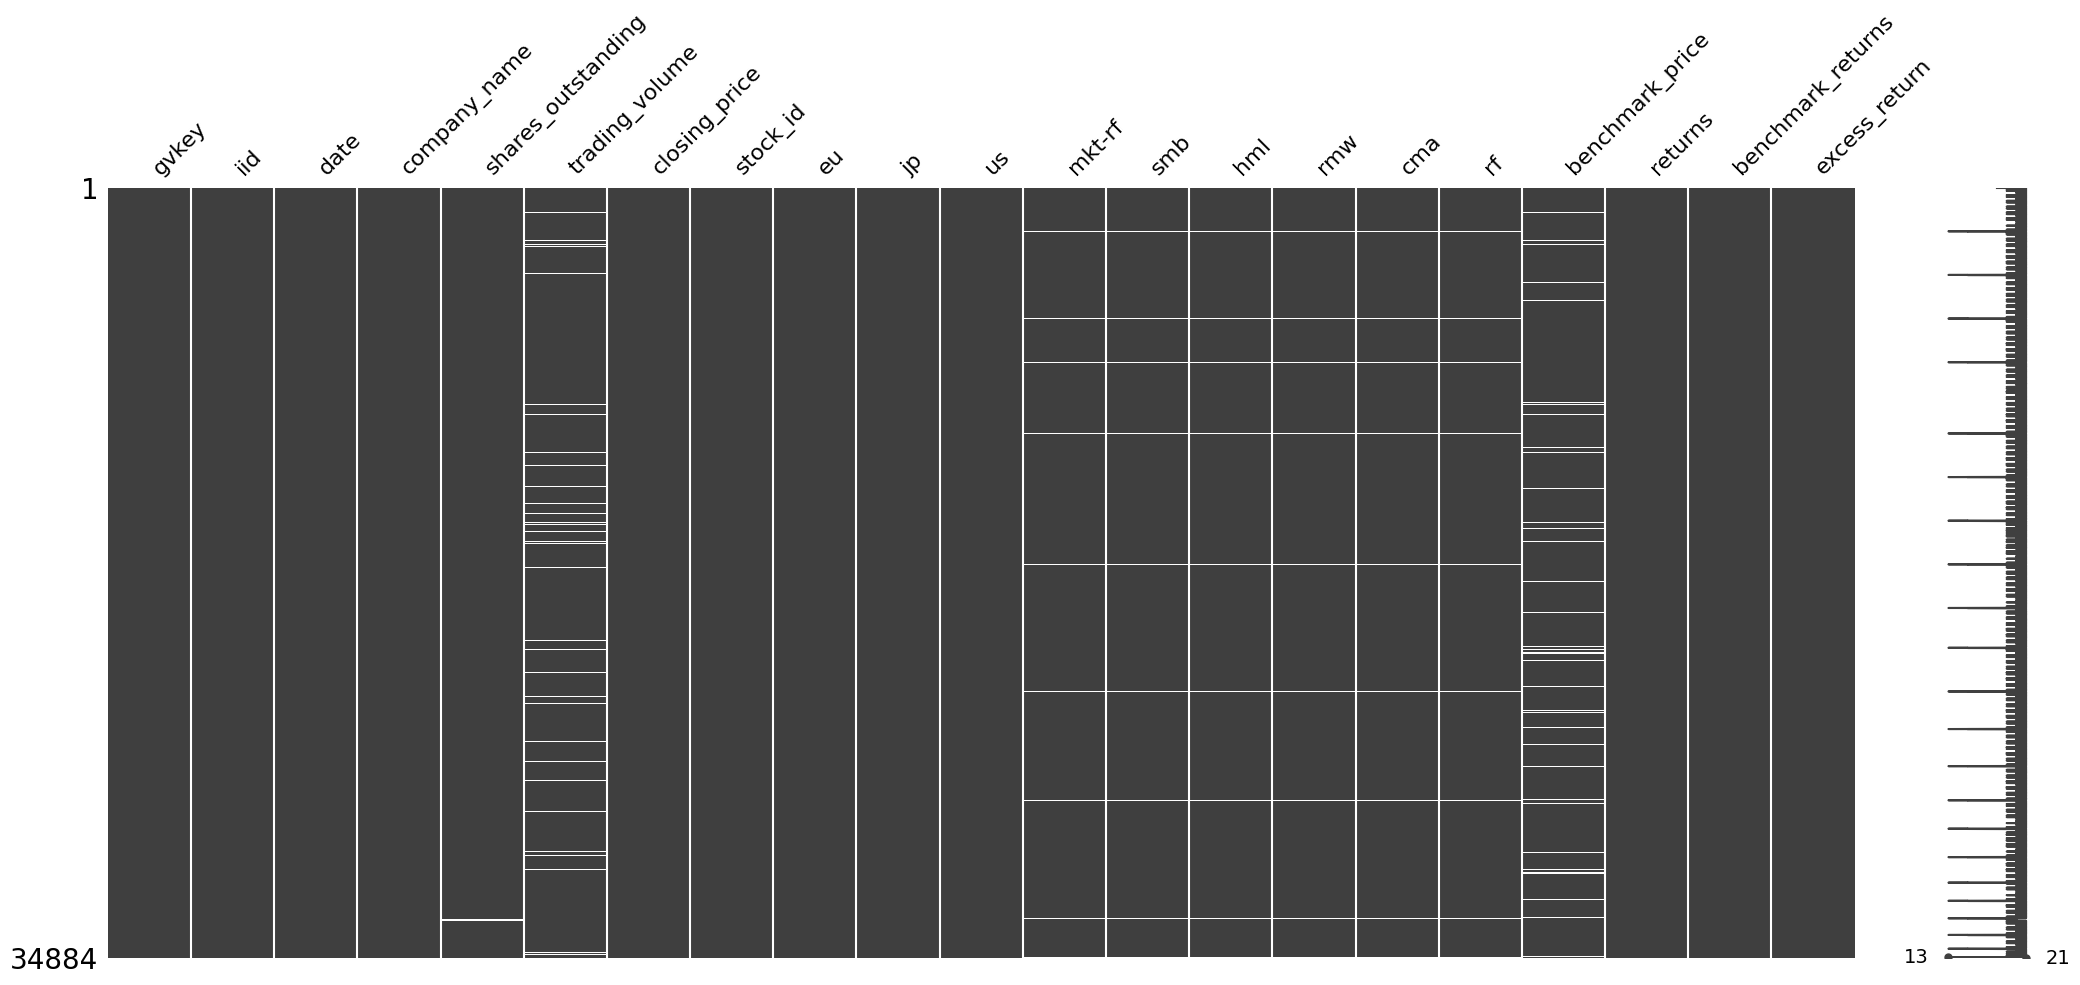

In [1743]:
# Plot missing values for eu.
%matplotlib inline

msno.matrix(stock_data_ff_stoxx_eu_df)

`shares_outstanding`, the missing values for the FF factors and `benchmark_price` can be filled with the last known value.

<Axes: >

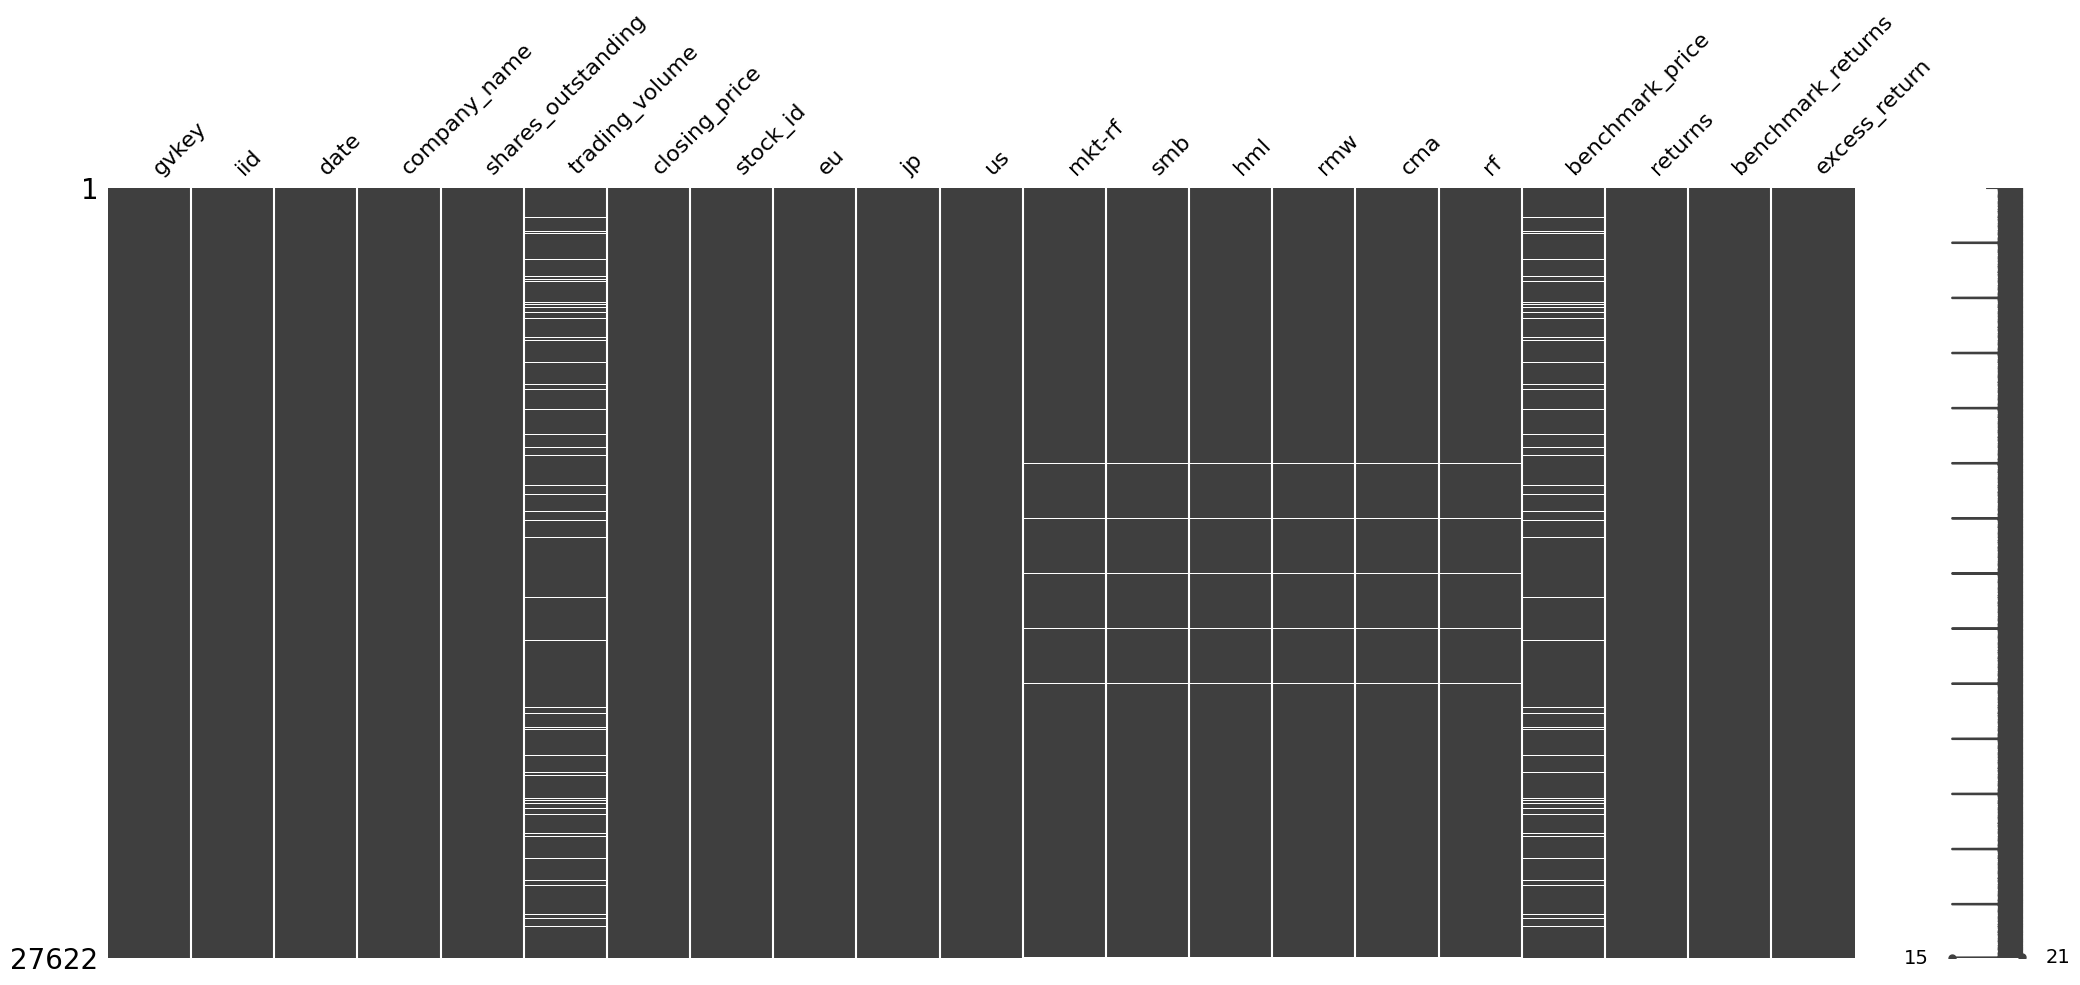

In [1744]:
# Plot missing values for jp.
%matplotlib inline

msno.matrix(stock_data_ff_topix_jp_df)

`shares_outstanding`, `closing_price` and, the missing values for the FF factors and `benchmark_price` can be filled with the last known value.

In [1745]:
# Fill missing values for shares_outstanding, closing_price, total_return_factor, Mkt-RF, SMB, HML, RMW, CMA, RF and benchmark_price.
stock_data_ff_topix_jp_df['shares_outstanding'] = stock_data_ff_topix_jp_df['shares_outstanding'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['closing_price'] = stock_data_ff_topix_jp_df['closing_price'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['benchmark_price'] = stock_data_ff_topix_jp_df['benchmark_price'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['mkt-rf'] = stock_data_ff_topix_jp_df['mkt-rf'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['smb'] = stock_data_ff_topix_jp_df['smb'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['hml'] = stock_data_ff_topix_jp_df['hml'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['rmw'] = stock_data_ff_topix_jp_df['rmw'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['cma'] = stock_data_ff_topix_jp_df['cma'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['rf'] = stock_data_ff_topix_jp_df['rf'].replace(np.nan).ffill()

<Axes: >

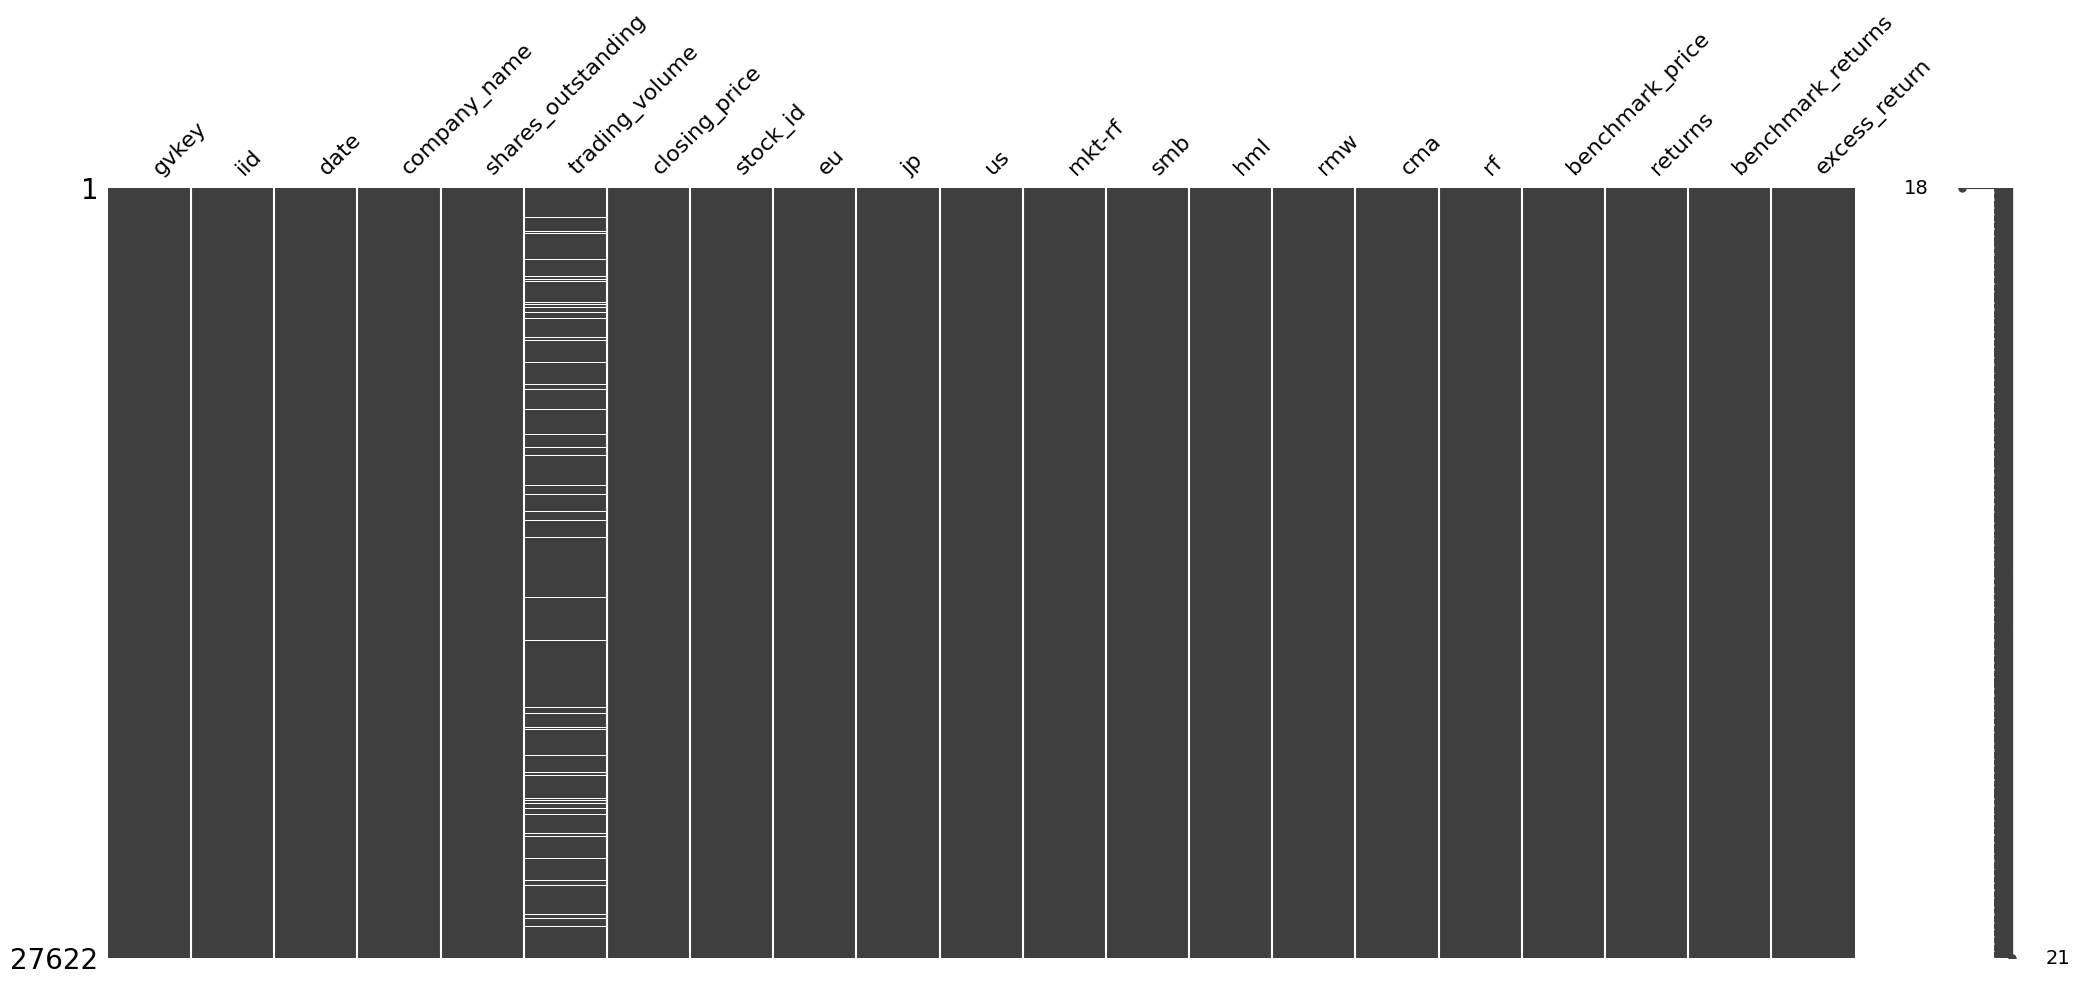

In [1746]:
# Check missing values plot after filling in missing values.
%matplotlib inline

msno.matrix(stock_data_ff_topix_jp_df)

<Axes: >

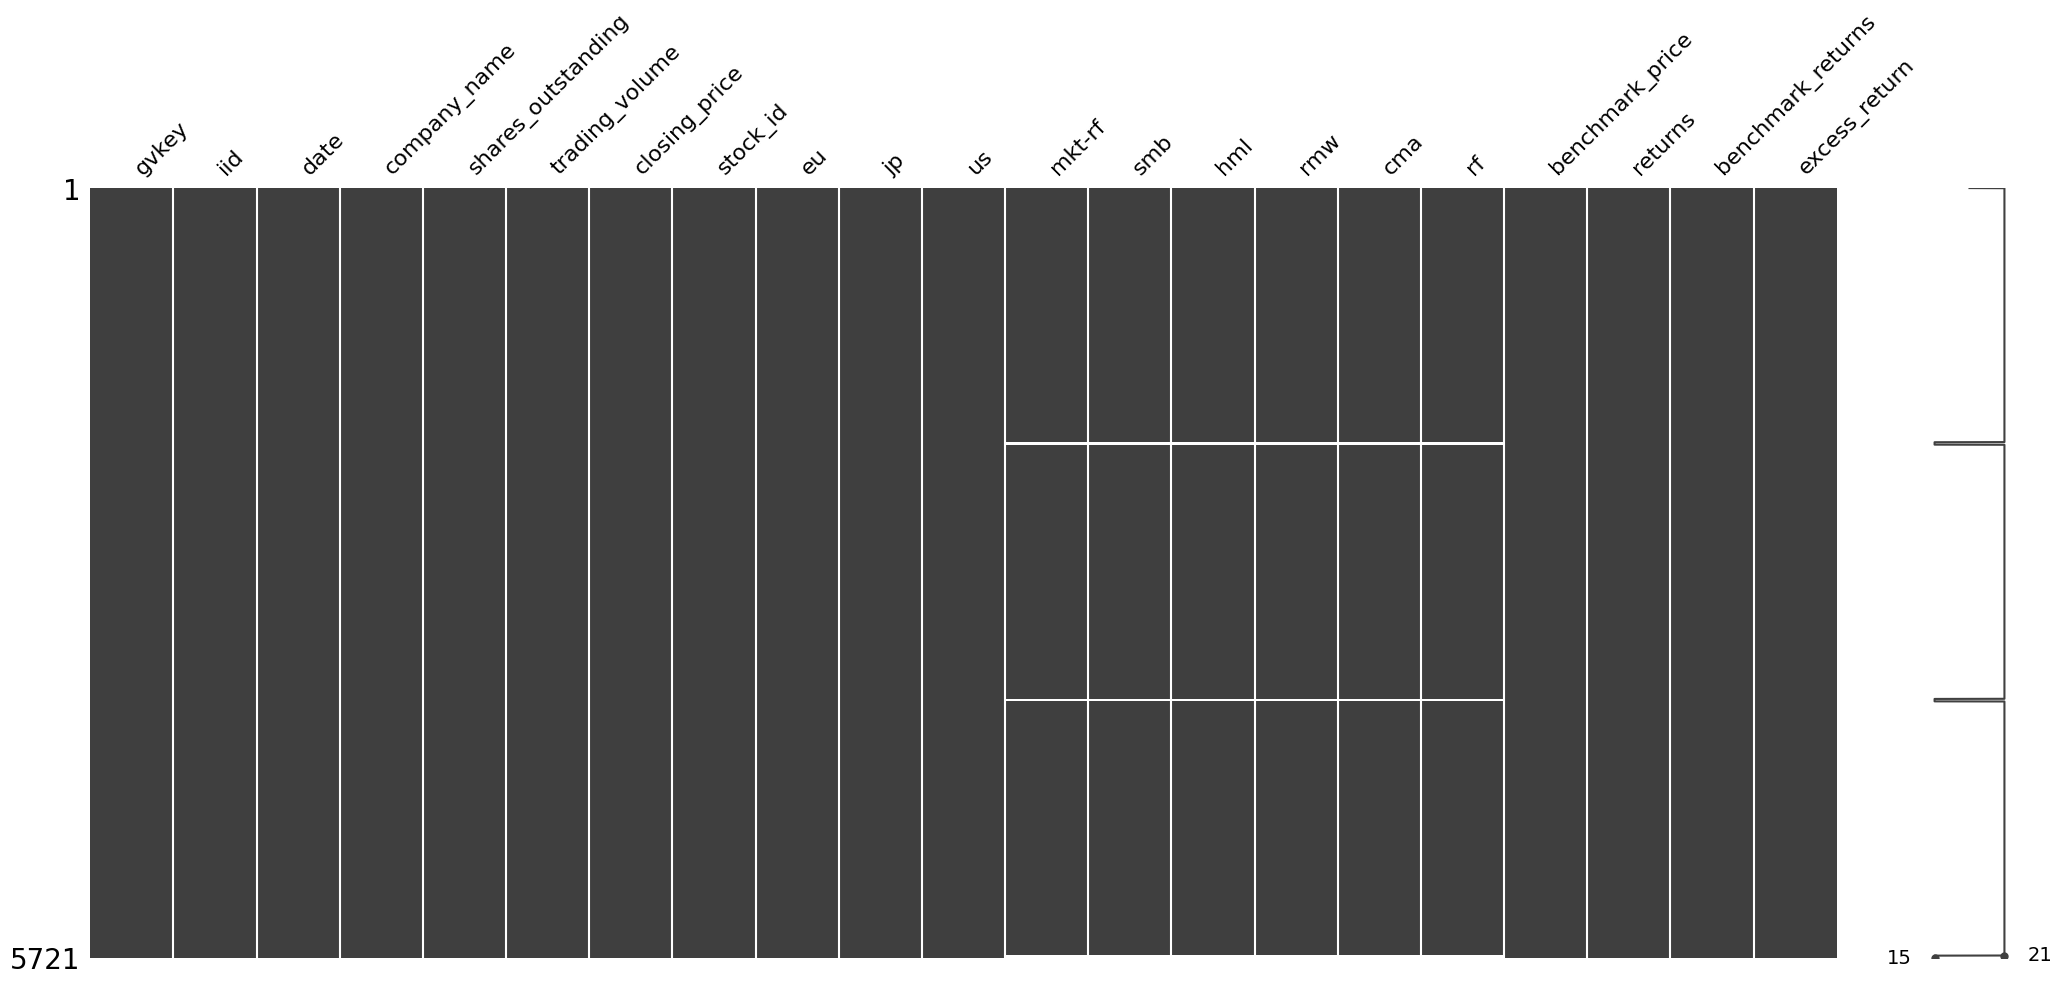

In [1747]:
# Plot missing values for us.
%matplotlib inline

msno.matrix(stock_data_ff_nasdaq_us_df[stock_data_ff_nasdaq_us_df['us']])

Missing values for the FF factors can be filled with the last known value.

In [1748]:
# Fill in missing data for FF factors.
# stock_data_ff_nasdaq_us_df['mkt-rf'] = stock_data_ff_nasdaq_us_df['mkt-rf'].replace(np.nan).ffill()
# stock_data_ff_nasdaq_us_df['smb'] = stock_data_ff_nasdaq_us_df['smb'].replace(np.nan).ffill()
# stock_data_ff_nasdaq_us_df['hml'] = stock_data_ff_nasdaq_us_df['hml'].replace(np.nan).ffill()
# stock_data_ff_nasdaq_us_df['rmw'] = stock_data_ff_nasdaq_us_df['rmw'].replace(np.nan).ffill()
# stock_data_ff_nasdaq_us_df['cma'] = stock_data_ff_nasdaq_us_df['cma'].replace(np.nan).ffill()
# stock_data_ff_nasdaq_us_df['rf'] = stock_data_ff_nasdaq_us_df['rf'].replace(np.nan).ffill()


<Axes: >

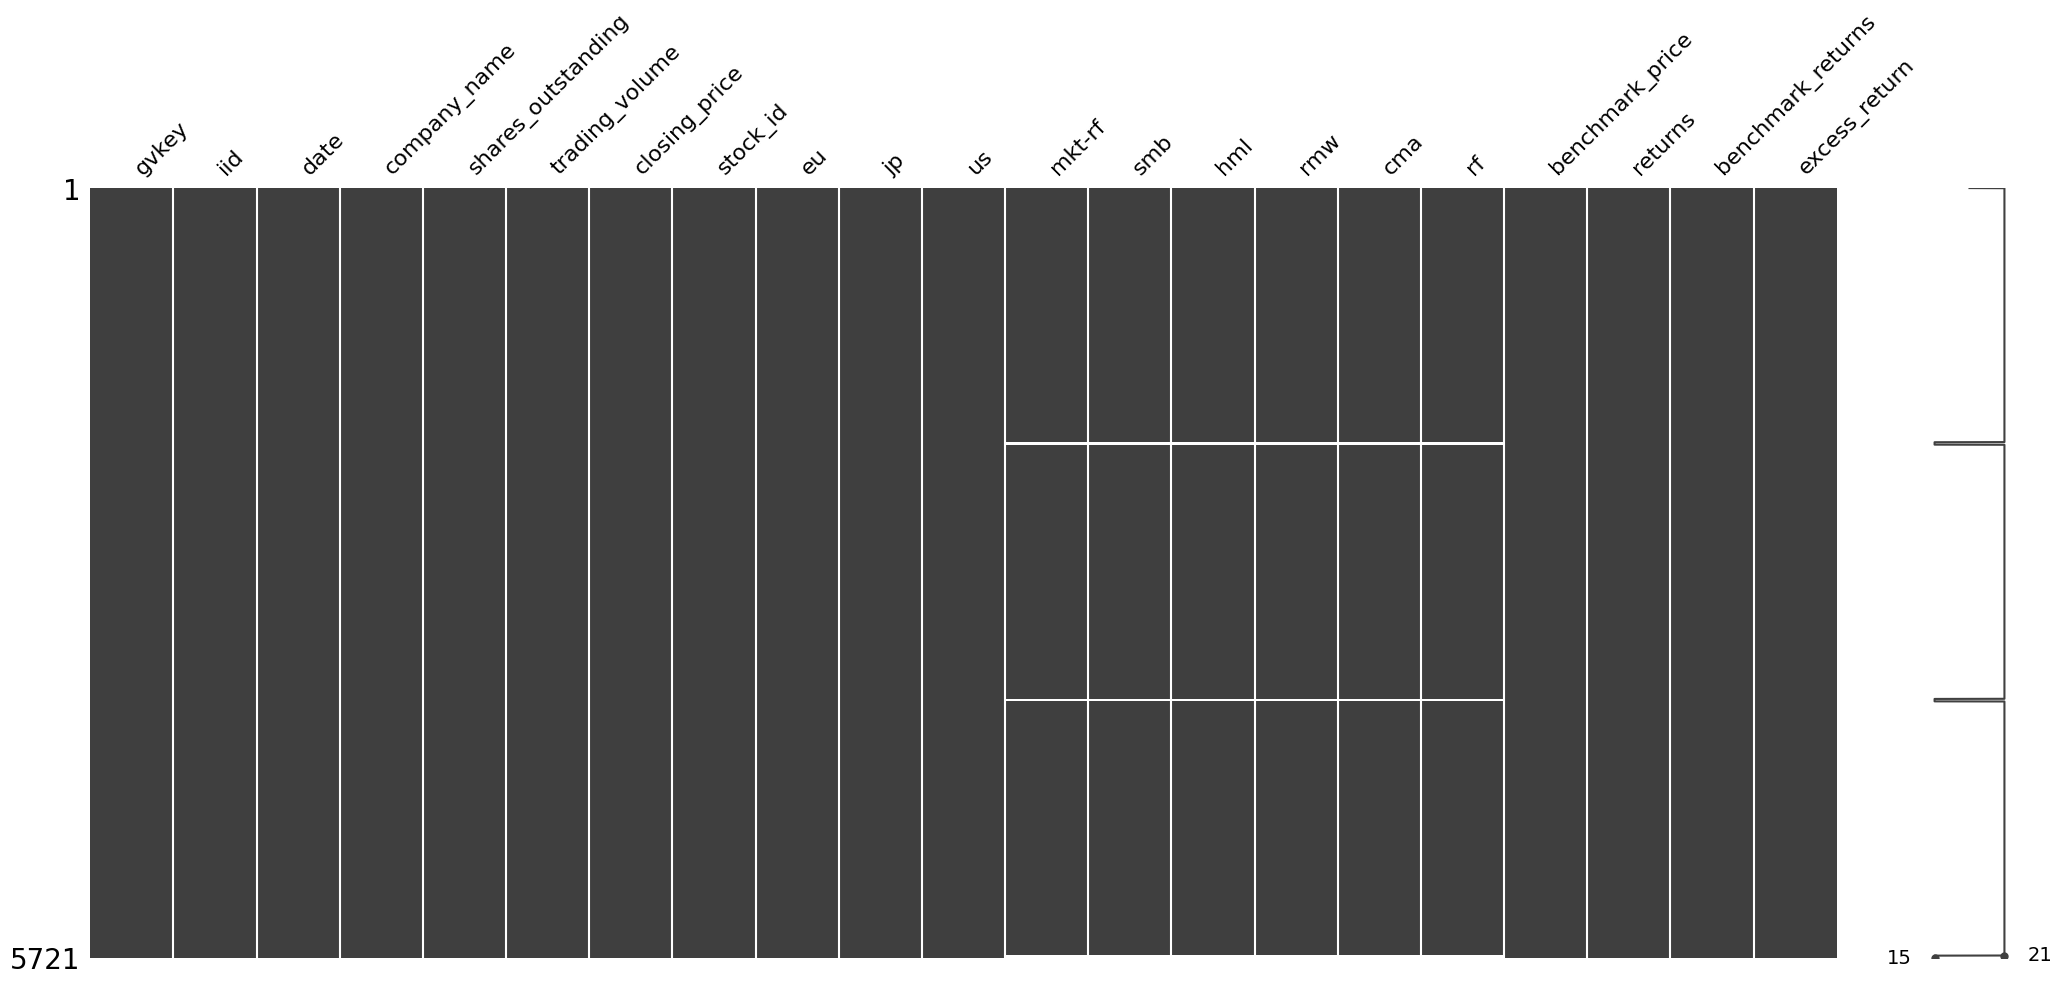

In [1749]:
# Check missing values plot after filling in missing values.
%matplotlib inline

msno.matrix(stock_data_ff_nasdaq_us_df)

In [1750]:
# Concat three region subset datasets.
datasets = [
    stock_data_ff_stoxx_eu_df,
    stock_data_ff_topix_jp_df,
    stock_data_ff_nasdaq_us_df
    ]
stock_ff_index_df = pd.concat(datasets)
stock_ff_index_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,...,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.00000,506501.00000,18.42000,FR0000054470,True,False,...,-0.29000,0.52000,0.24000,-0.11000,0.22000,0.00000,308.80000,NaN,NaN,NaN
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.00000,217260.00000,18.15500,FR0000054470,True,False,...,0.93000,-0.36000,0.14000,-0.25000,0.22000,0.00000,310.56000,-0.01439,0.00570,-0.02009
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.00000,267647.00000,18.35500,FR0000054470,True,False,...,2.37000,-1.31000,0.43000,-0.20000,0.06000,0.00000,319.53000,0.01102,0.02888,-0.01787
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.00000,984676.00000,19.90000,FR0000054470,True,False,...,1.33000,-0.10000,0.66000,0.04000,0.05000,0.00000,321.06000,0.08417,0.00479,0.07938
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.00000,740257.00000,20.12000,FR0000054470,True,False,...,-0.07000,0.07000,1.52000,-0.54000,0.56000,0.00000,319.89000,0.01106,-0.00364,0.01470


Need to convert prices from multiple currencies into dollars for a comparable market cap variable later. Import exchange rates and then apply them to each of the companies.

In [1751]:
# Load currencies.
fx_df = pd.read_csv(
    '/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/fx_mid_price_history_daily.csv',
    skiprows=2,
    delimiter=';',
    header=0,
    names=[
        'date',
        'NOKUSD',
        'GBPUSD',
        'JPYUSD',
        'SEKUSD',
        'PLNUSD',
        'EURUSD'
    ]
)
fx_df.head()

,date,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD
0,10/01/15,"0,118694","1,515400","0,008358","0,119848","0,263811","1,120400"
1,10/02/15,"0,120013","1,520150","0,008388","0,120244","0,265097","1,127550"
2,10/05/15,"0,119100","1,517700","0,008314","0,120219","0,264225","1,121150"
3,10/06/15,"0,120576","1,521150","0,008321","0,121265","0,264925","1,126300"
4,10/07/15,"0,121766","1,531450","0,008335","0,121264","0,265361","1,123700"


In [1752]:
fx_df.dtypes

date      object
NOKUSD    object
GBPUSD    object
JPYUSD    object
SEKUSD    object
PLNUSD    object
EURUSD    object
dtype: object

In [1753]:
# Using companies_list from earlier in the notebook which loads a dictionary of
# information on all of the companies included in the study.
fx_df['NOKUSD'] = fx_df['NOKUSD'].map(replace_decimal_separator)
fx_df['GBPUSD'] = fx_df['GBPUSD'].map(replace_decimal_separator)
fx_df['JPYUSD'] = fx_df['JPYUSD'].map(replace_decimal_separator)
fx_df['SEKUSD'] = fx_df['SEKUSD'].map(replace_decimal_separator)
fx_df['PLNUSD'] = fx_df['PLNUSD'].map(replace_decimal_separator)
fx_df['EURUSD'] = fx_df['EURUSD'].map(replace_decimal_separator)
fx_df.head()

,date,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD
0,10/01/15,0.118694,1.515400,0.008358,0.119848,0.263811,1.120400
1,10/02/15,0.120013,1.520150,0.008388,0.120244,0.265097,1.127550
2,10/05/15,0.119100,1.517700,0.008314,0.120219,0.264225,1.121150
3,10/06/15,0.120576,1.521150,0.008321,0.121265,0.264925,1.126300
4,10/07/15,0.121766,1.531450,0.008335,0.121264,0.265361,1.123700


In [1754]:
# Parse columns correctly.
fx_df['date'] = fx_df['date'].map(parse_date_column_mdy)
fx_df['NOKUSD'] = fx_df['NOKUSD'].astype(float)
fx_df['GBPUSD'] = fx_df['GBPUSD'].astype(float)
fx_df['JPYUSD'] = fx_df['JPYUSD'].astype(float)
fx_df['SEKUSD'] = fx_df['SEKUSD'].astype(float)
fx_df['PLNUSD'] = fx_df['PLNUSD'].astype(float)
fx_df['EURUSD'] = fx_df['EURUSD'].astype(float)
fx_df.dtypes

date      datetime64[ns]
NOKUSD           float64
GBPUSD           float64
JPYUSD           float64
SEKUSD           float64
PLNUSD           float64
EURUSD           float64
dtype: object

In [1755]:
# FX data now ready to be joined with the rest of the financial data.
fx_df.head()

,date,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD
0,2015-10-01,0.11869,1.51540,0.00836,0.11985,0.26381,1.12040
1,2015-10-02,0.12001,1.52015,0.00839,0.12024,0.26510,1.12755
2,2015-10-05,0.11910,1.51770,0.00831,0.12022,0.26422,1.12115
3,2015-10-06,0.12058,1.52115,0.00832,0.12126,0.26493,1.12630
4,2015-10-07,0.12177,1.53145,0.00834,0.12126,0.26536,1.12370


In [1756]:
# Join fx data to stock data.
stock_ff_fx_index_df = pd.merge(stock_ff_index_df, fx_df, how='left', on='date')
stock_ff_fx_index_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,...,benchmark_price,returns,benchmark_returns,excess_return,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.00000,506501.00000,18.42000,FR0000054470,True,False,...,308.80000,NaN,NaN,NaN,0.11869,1.51540,0.00836,0.11985,0.26381,1.12040
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.00000,217260.00000,18.15500,FR0000054470,True,False,...,310.56000,-0.01439,0.00570,-0.02009,0.12001,1.52015,0.00839,0.12024,0.26510,1.12755
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.00000,267647.00000,18.35500,FR0000054470,True,False,...,319.53000,0.01102,0.02888,-0.01787,0.11910,1.51770,0.00831,0.12022,0.26422,1.12115
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.00000,984676.00000,19.90000,FR0000054470,True,False,...,321.06000,0.08417,0.00479,0.07938,0.12058,1.52115,0.00832,0.12126,0.26493,1.12630
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.00000,740257.00000,20.12000,FR0000054470,True,False,...,319.89000,0.01106,-0.00364,0.01470,0.12177,1.53145,0.00834,0.12126,0.26536,1.12370


In [1757]:
stock_ff_fx_index_df.columns

Index(['gvkey', 'iid', 'date', 'company_name', 'shares_outstanding',
       'trading_volume', 'closing_price', 'stock_id', 'eu', 'jp', 'us',
       'mkt-rf', 'smb', 'hml', 'rmw', 'cma', 'rf', 'benchmark_price',
       'returns', 'benchmark_returns', 'excess_return', 'NOKUSD', 'GBPUSD',
       'JPYUSD', 'SEKUSD', 'PLNUSD', 'EURUSD'],
      dtype='object')

In [1758]:
# Prevent printing scientific notation for latex tables.
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [1759]:
# Calculate market capitalisation in local currency.
stock_ff_fx_index_df['market_cap'] = stock_ff_fx_index_df['closing_price'] * stock_ff_fx_index_df['shares_outstanding']
stock_ff_fx_index_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,...,returns,benchmark_returns,excess_return,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD,market_cap
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.00000,506501.00000,18.42000,FR0000054470,True,False,...,NaN,NaN,NaN,0.11869,1.51540,0.00836,0.11985,0.26381,1.12040,2048644125.30000
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.00000,217260.00000,18.15500,FR0000054470,True,False,...,-0.01439,0.00570,-0.02009,0.12001,1.52015,0.00839,0.12024,0.26510,1.12755,2019171232.07500
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.00000,267647.00000,18.35500,FR0000054470,True,False,...,0.01102,0.02888,-0.01787,0.11910,1.51770,0.00831,0.12022,0.26422,1.12115,2041414925.07500
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.00000,984676.00000,19.90000,FR0000054470,True,False,...,0.08417,0.00479,0.07938,0.12058,1.52115,0.00832,0.12126,0.26493,1.12630,2213247453.50000
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.00000,740257.00000,20.12000,FR0000054470,True,False,...,0.01106,-0.00364,0.01470,0.12177,1.53145,0.00834,0.12126,0.26536,1.12370,2237715515.80000


In [1760]:
# Function for calculating market cap in dollars using companies_list from earlier in the notebook.
def usd_mkt_cap(stock_id_string, mkt_cap_local, nok_usd, gbp_usd, jpy_usd, sek_usd, pln_usd, eur_usd):
    # Loop through companies_list
    for company in companies_list:
        # If input stock_id matches one of the stock_ids in companies_list
        if company['stock_id'] == stock_id_string:
            if company['currency'] == 'USD':
                usd_mkt_cap = mkt_cap_local
            elif company['currency'] == 'NOK':
                usd_mkt_cap = mkt_cap_local * nok_usd
            elif company['currency'] == 'GBP':
                usd_mkt_cap = mkt_cap_local * gbp_usd
            elif company['currency'] == 'JPY':
                usd_mkt_cap = mkt_cap_local * jpy_usd
            elif company['currency'] == 'SEK':
                usd_mkt_cap = mkt_cap_local * sek_usd
            elif company['currency'] == 'PLN':
                usd_mkt_cap = mkt_cap_local * pln_usd
            elif company['currency'] == 'EUR':
                usd_mkt_cap = mkt_cap_local * eur_usd
            else:
                print(stock_id_string)
                print('No matching currency')
        else:
            continue
    return usd_mkt_cap

In [1761]:
# Now calculate market_cap in dollars.
stock_ff_fx_index_df['mkt_cap_usd'] = stock_ff_fx_index_df.apply(lambda x: usd_mkt_cap(stock_id_string=x['stock_id'],mkt_cap_local=x['market_cap'],nok_usd=x['NOKUSD'],gbp_usd=x['GBPUSD'],jpy_usd=x['JPYUSD'],sek_usd=x['SEKUSD'],pln_usd=x['PLNUSD'],eur_usd=x['EURUSD']), axis=1)
stock_ff_fx_index_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,...,benchmark_returns,excess_return,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD,market_cap,mkt_cap_usd
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.00000,506501.00000,18.42000,FR0000054470,True,False,...,NaN,NaN,0.11869,1.51540,0.00836,0.11985,0.26381,1.12040,2048644125.30000,2295300877.98612
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.00000,217260.00000,18.15500,FR0000054470,True,False,...,0.00570,-0.02009,0.12001,1.52015,0.00839,0.12024,0.26510,1.12755,2019171232.07500,2276716522.72617
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.00000,267647.00000,18.35500,FR0000054470,True,False,...,0.02888,-0.01787,0.11910,1.51770,0.00831,0.12022,0.26422,1.12115,2041414925.07500,2288732343.24784
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.00000,984676.00000,19.90000,FR0000054470,True,False,...,0.00479,0.07938,0.12058,1.52115,0.00832,0.12126,0.26493,1.12630,2213247453.50000,2492780606.87705
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.00000,740257.00000,20.12000,FR0000054470,True,False,...,-0.00364,0.01470,0.12177,1.53145,0.00834,0.12126,0.26536,1.12370,2237715515.80000,2514520925.10446


Create a `trading_volume` to market_cap_usd ratio.

In [1762]:
stock_ff_fx_index_df.columns

Index(['gvkey', 'iid', 'date', 'company_name', 'shares_outstanding',
       'trading_volume', 'closing_price', 'stock_id', 'eu', 'jp', 'us',
       'mkt-rf', 'smb', 'hml', 'rmw', 'cma', 'rf', 'benchmark_price',
       'returns', 'benchmark_returns', 'excess_return', 'NOKUSD', 'GBPUSD',
       'JPYUSD', 'SEKUSD', 'PLNUSD', 'EURUSD', 'market_cap', 'mkt_cap_usd'],
      dtype='object')

In [1763]:
stock_ff_fx_index_df['volume_to_shares_outstanding'] = stock_ff_fx_index_df['trading_volume']/stock_ff_fx_index_df['shares_outstanding']
stock_ff_fx_index_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,...,excess_return,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD,market_cap,mkt_cap_usd,volume_to_shares_outstanding
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.00000,506501.00000,18.42000,FR0000054470,True,False,...,NaN,0.11869,1.51540,0.00836,0.11985,0.26381,1.12040,2048644125.30000,2295300877.98612,0.00455
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.00000,217260.00000,18.15500,FR0000054470,True,False,...,-0.02009,0.12001,1.52015,0.00839,0.12024,0.26510,1.12755,2019171232.07500,2276716522.72617,0.00195
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.00000,267647.00000,18.35500,FR0000054470,True,False,...,-0.01787,0.11910,1.51770,0.00831,0.12022,0.26422,1.12115,2041414925.07500,2288732343.24784,0.00241
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.00000,984676.00000,19.90000,FR0000054470,True,False,...,0.07938,0.12058,1.52115,0.00832,0.12126,0.26493,1.12630,2213247453.50000,2492780606.87705,0.00885
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.00000,740257.00000,20.12000,FR0000054470,True,False,...,0.01470,0.12177,1.53145,0.00834,0.12126,0.26536,1.12370,2237715515.80000,2514520925.10446,0.00666


Now that the financial data is joined into a single dataset we only need to handle missing values.

<Axes: >

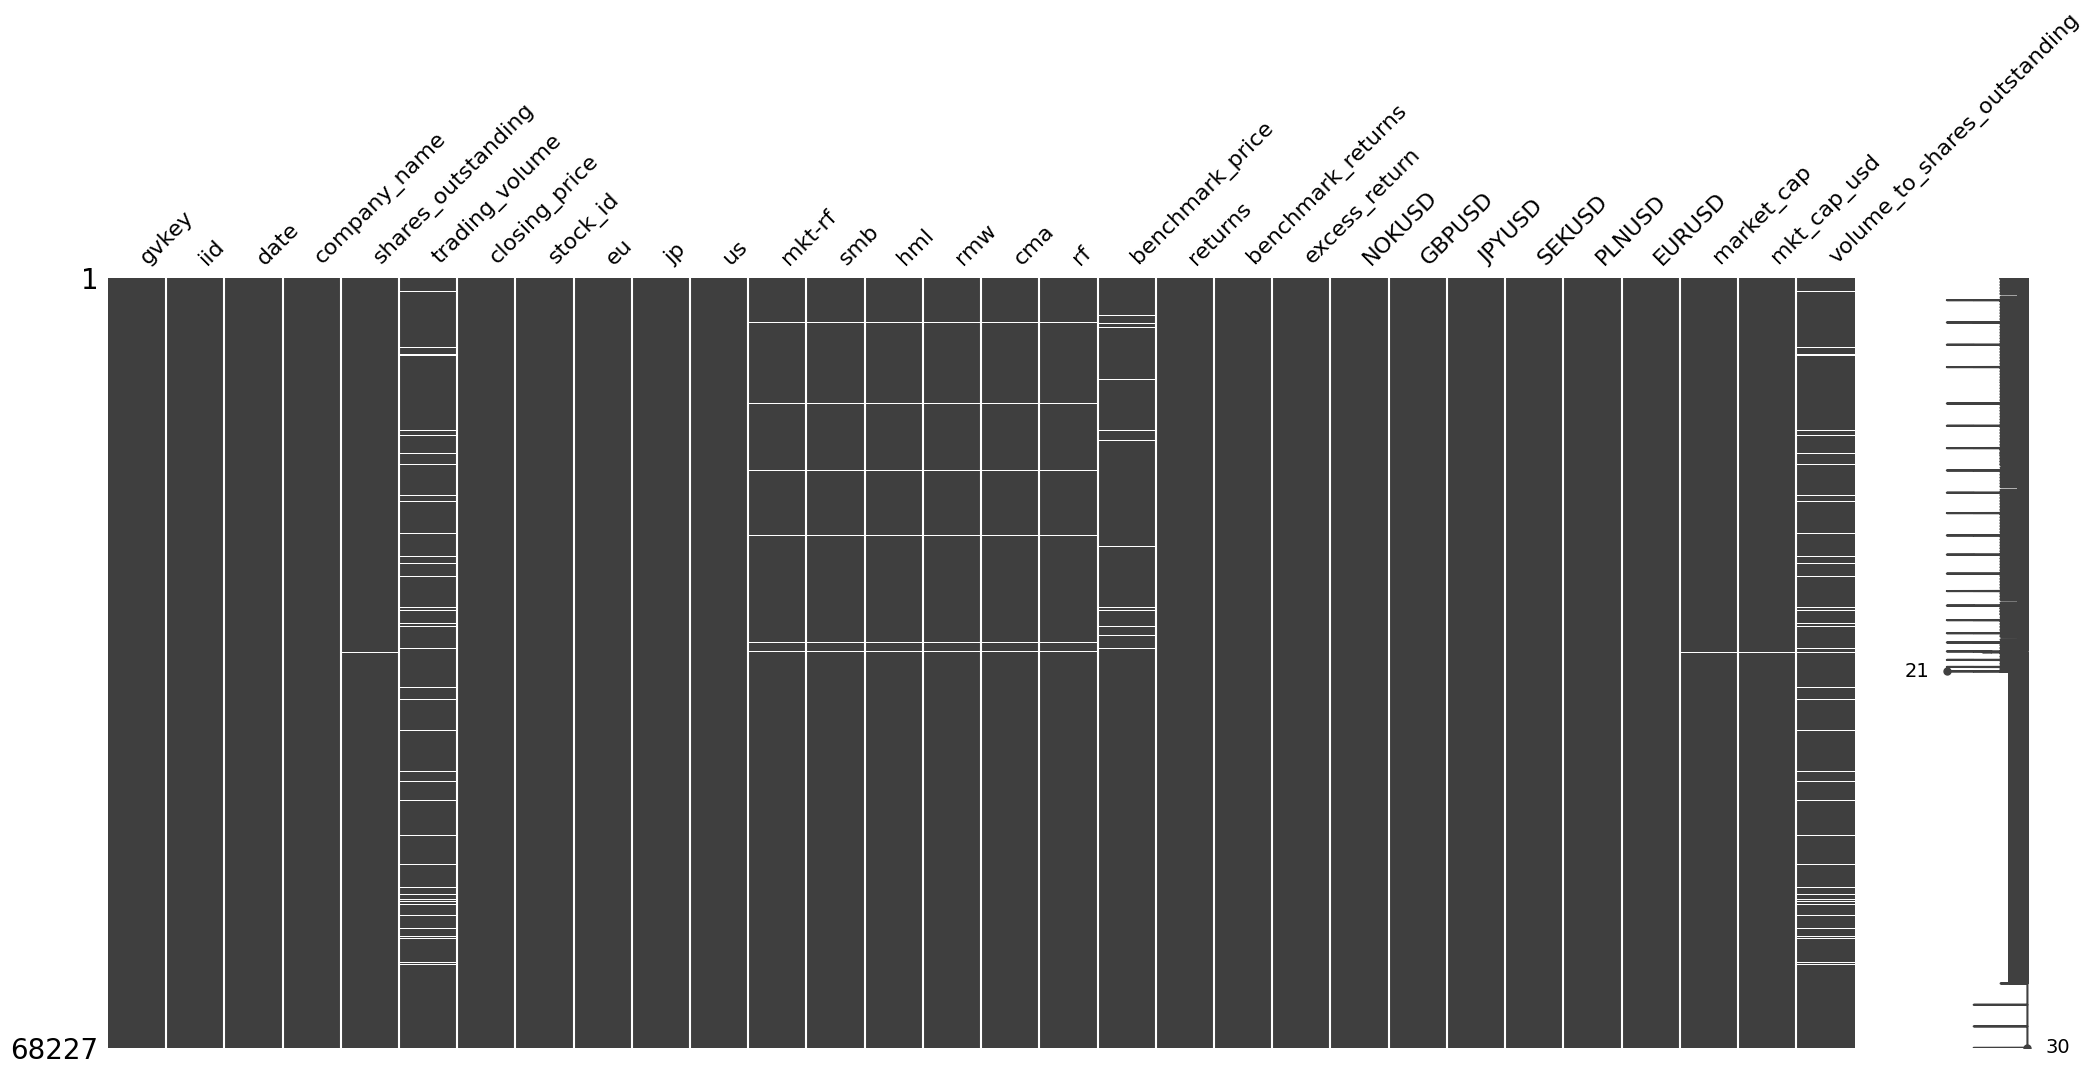

In [1764]:
# Check missing data for complete financial dataset.
%matplotlib inline

msno.matrix(stock_ff_fx_index_df)

The financial data is now clean and ready for use. Note that trading volume has quite a bit of missing data and this has been left as is for fear of interpolation methods over so many observations corrupting the statistical results. Most days will likely be discarded and trading volume is kept in for now (as is) in the hope that the data is available for the observation days chosen due to game releases.

In [1765]:
stock_ff_fx_index_df.to_csv('financial_data_clean.csv')

In [1766]:
stock_ff_fx_index_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,stock_id,eu,jp,...,excess_return,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD,market_cap,mkt_cap_usd,volume_to_shares_outstanding
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.00000,506501.00000,18.42000,FR0000054470,True,False,...,NaN,0.11869,1.51540,0.00836,0.11985,0.26381,1.12040,2048644125.30000,2295300877.98612,0.00455
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.00000,217260.00000,18.15500,FR0000054470,True,False,...,-0.02009,0.12001,1.52015,0.00839,0.12024,0.26510,1.12755,2019171232.07500,2276716522.72617,0.00195
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.00000,267647.00000,18.35500,FR0000054470,True,False,...,-0.01787,0.11910,1.51770,0.00831,0.12022,0.26422,1.12115,2041414925.07500,2288732343.24784,0.00241
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.00000,984676.00000,19.90000,FR0000054470,True,False,...,0.07938,0.12058,1.52115,0.00832,0.12126,0.26493,1.12630,2213247453.50000,2492780606.87705,0.00885
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.00000,740257.00000,20.12000,FR0000054470,True,False,...,0.01470,0.12177,1.53145,0.00834,0.12126,0.26536,1.12370,2237715515.80000,2514520925.10446,0.00666
